# Initialize

In [1]:
visible_devices = [2]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std # type: ignore
from GMetrics.plotters import cornerplotter, plot_corr_matrix # type: ignore

sys.path.insert(0,'utils_func/')
import MixtureDistributions # type: ignore
from optimizers_mixture import compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results/5D_mixture/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-04-15 16:39:09.347783: Importing os...
2024-04-15 16:39:09.348127: Importing sys...
Visible devices: [2]
2024-04-15 16:39:09.348724: Importing timer from timeit...
2024-04-15 16:39:09.348889: Setting env variables for tf import (only device(s) [2] will be available)...
2024-04-15 16:39:09.349388: Importing numpy...
2024-04-15 16:39:09.490680: Importing matplotlib...


2024-04-15 16:39:09.821888: Importing h5py...
2024-04-15 16:39:09.840816: Importing importlib.util...
2024-04-15 16:39:09.840925: Importing json...
2024-04-15 16:39:09.840993: Importing pandas...
2024-04-15 16:39:10.110852: Importing random...
2024-04-15 16:39:10.111023: Importing scipy utils...
2024-04-15 16:39:10.442498: Importing subprocess...
2024-04-15 16:39:10.442641: Importing tensorflow...
Tensorflow version: 2.12.0
2024-04-15 16:39:12.396920: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-04-15 16:39:12.657060: Importing timeit...
2024-04-15 16:39:12.657134: Importing tqdm...
2024-04-15 16:39:12.659605: Importing typing...
2024-04-15 16:39:12.659687: Setting tf configs...
2024-04-15 16:39:12.756458: Importing GMetrics module...
2024-04-15 16:39:15.447164: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #2, model: NVIDIA A40
Loaded 1 GPUs: ['NVIDIA A40']
Model directory exists
2024-04-15 16:39:15.498244: All done.


# Model definition

In [2]:
seed = 0
ncomp = 3
ndims = 5
niter = 10_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)


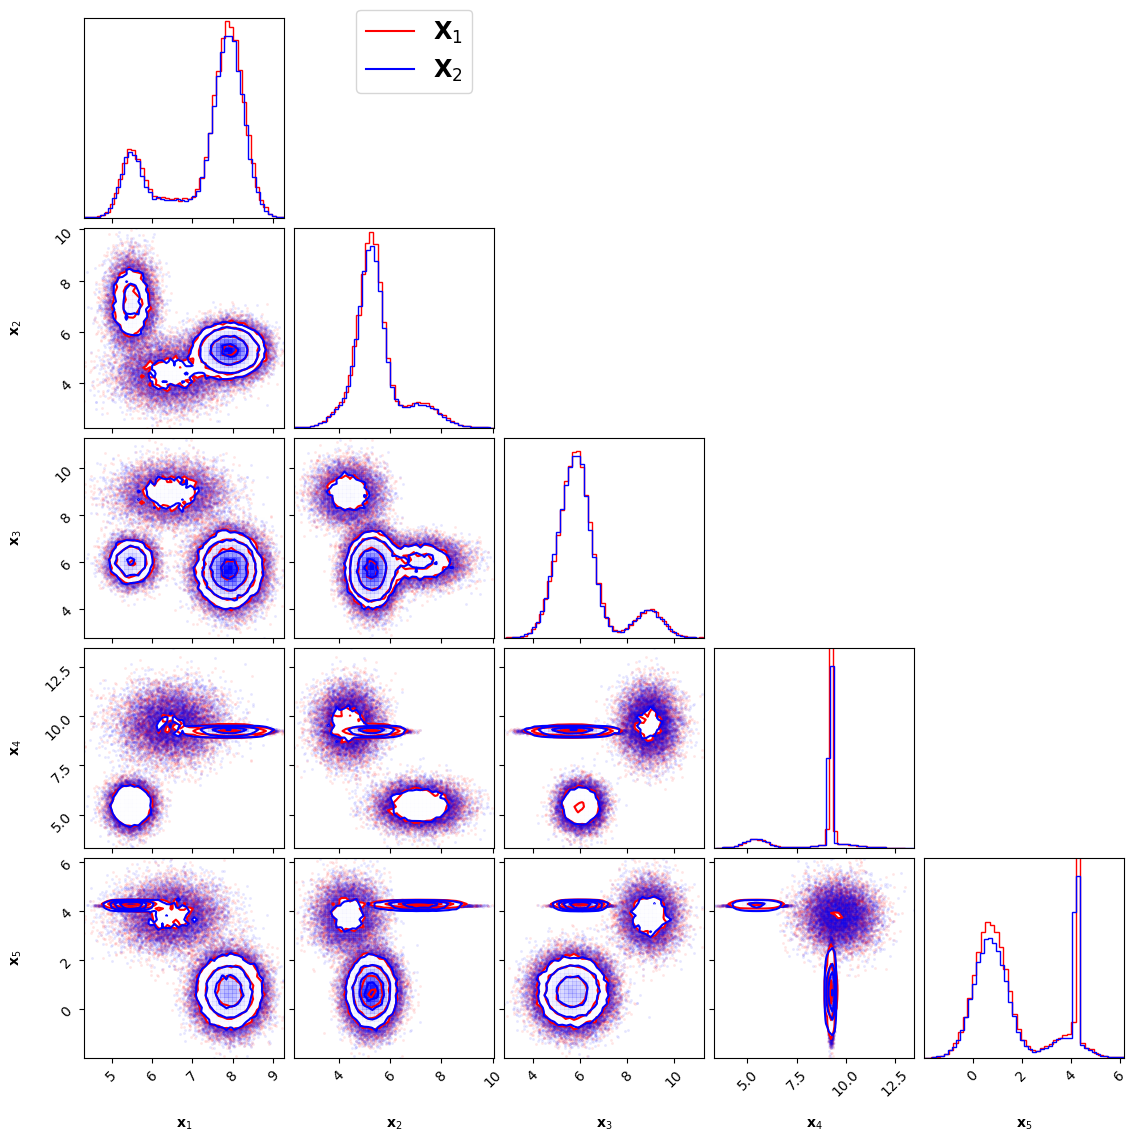

In [3]:
cornerplotter(dist_1 = dist_1, 
              dist_2 = dist_2, 
              path_to_plots = results_dir, 
              figure_name = "corner_plot.png",
              max_points = 50_000,
              max_dim = 32,
              n_bins = 50,
              show = True,
              save = True)

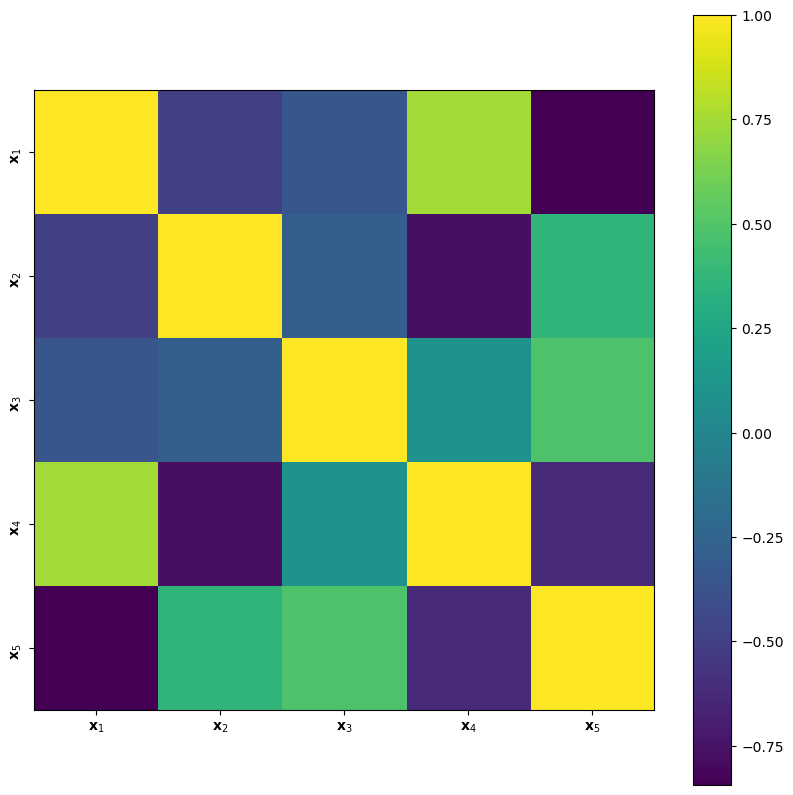

In [3]:
plot_corr_matrix(dist = dist_1,
                 path_to_plots = results_dir,
                 figure_name = "corre_matrix_plot.pdf",
                 max_points = 1_000_000,
                 show_labels = True,
                 show = True,
                 save = True)

# Fixed $n=10000$

## Null hypotheses

### Model definition

In [2]:
batch_size_test = 10_000

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)


In [3]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [4]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 100000000
batch_size 10000
niter 10000
niter * batch_size 100000000
small_sample False


In [5]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 10_000,
                               num_batches = 1,
                               batch_size = 10_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [6]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

niter  batch_size_test  batch_size_gen  small_sample_threshold dtype_input  \
0  10000            10000           10000                10000000     float64   

   seed  use_tf  mirror_strategy strategy  verbose  ...  ndims_1  nsamples_1  \
0     0    True            False     None     True  ...        5           0   

   is_symb_2  ndims_2  nsamples_2    dtype ndims   nsamples  small_sample  \
0       True        5           0  float64     5  100000000         False   

   ncomp  
0      3  

[1 rows x 21 columns]

In [7]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                      "object_name": "FNMetric",
                                      "class_name": "GMetrics.FNMetric",
                                      "kwargs": {},
                                      "result_key": "metric_list", 
                                      "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                      "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                      "test_config": test_config_null,
                                      "max_vectorize": 5000, # optimized for 5D
                                      "latex": "$\overline{\|\cdot\|}_{F}$",
                                      "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10_000,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 10_000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000, # optimized for 5D
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1_000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 1_000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10, # optimized for 5D
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2000,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 10000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 5,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 5,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 5,
   'nsamples': 100000000,
   'small_sample': False,
   'ncomp': 3},
  'max_vectorize': 5000,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results/5D_10K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_key': 'metr

### Evaluate null hypotheses

In [8]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from ../results/5D_10K/null_hypothesis/FN.json
Loading fpd from ../results/5D_10K/null_hypothesis/FPD.json
Loading kpd from ../results/5D_10K/null_hypothesis/KPD.json
Loading ks from ../results/5D_10K/null_hypothesis/KS.json


Loading sks from ../results/5D_10K/null_hypothesis/SKS.json
Loading swd from ../results/5D_10K/null_hypothesis/SWD.json


In [9]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.7325348105633029], [0.95, [9500, 500], 1.208377069509802], [0.99, [9900, 100], 1.5463530858752372]]
Computing time for metric fn: 30.909686719998717
ThresholdS for metric fpd: [[0.68, [6800, 3199], 1.0175550386551708], [0.95, [9500, 500], 1.5583746551772077], [0.99, [9900, 100], 2.2347410983350775]]
Computing time for metric fpd: 439.1285942999966
ThresholdS for metric kpd: [[0.68, [6800, 3199], 0.05742642381001417], [0.95, [9500, 500], 0.2788081877733717], [0.99, [9900, 100], 0.4952883563884569]]
Computing time for metric kpd: 2197.245959234002
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9149967015224115], [0.95, [9500, 500], 1.1370277746174993], [0.99, [9900, 100], 1.291177133500941]]
Computing time for metric ks: 59.285538817995985
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9062283657910839], [0.95, [9500, 500], 1.1068345889394846], [0.99, [9900, 100], 1.2480436536081871]]
Computing time for metric sks: 826.202600266995

name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f86fcd0f010>   
1          metric_list  <function <lambda> at 0x7f86fcd0fbe0>   
2          metric_list  <function <lambda> at 0x7f86f4114ca0>   
3      statistic_means  <function <lambda> at 0x7f86f4114d30>   
4         metric_means  <function <lambda> at 0x7f86f4114dc0>   
5         metric_means  <function <lambda> at 0x7f86f4114e50>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f86f4114ee0>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1             lambda ns, ndims: 10_000   
2              lambda ns, ndims: 1_000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 10000, 'ba...           5000   
1  {'niter': 10000, 'batch_size_test': 10000, 'ba...           1000   
2  {'niter': 10000, 'batch_size_test': 10000, 'ba...             10   
3  {'niter': 10000, 'batch_size_test': 10000, 'ba...          10000   
4  {'niter': 10000, 'batch_size_test': 10000, 'ba...            500   
5  {'niter': 10000, 'batch_size_test': 10000, 'ba...            500   
6  {'niter': 10000, 'batch_size_test': 10000, 'ba...           2000   

                        latex                                   null_file  \
0  $\overline{\|\cdot\|}_{F}$   ../results/5D_10K/null_hypothesis/FN.json   
1          $d_{\mathrm{FPD}}$  ../results/5D_10K/null_hypothesis/FPD.json   
2          $d_{\mathrm{KPD}}$  ../results/5D_10K/null_hypothesis/KPD.json   
3              $\overline{D}$   ../results/5D_10K/null_hypothesis/KS.json   
4             $\widetilde{D}$  ../results/5D_10K/null_hypothesis/SKS.json   
5             $\widetilde{W}$  ../results/5D_10K/null_hypothesis/SWD.json   
6                   $t_{\mu}$   ../results/5D_10K/null_hypothesis/LR.json   

                                          thresholds  
0  [[0.68, [6800, 3199], 0.7325348105633029], [0....  
1  [[0.68, [6800, 3199], 1.0175550386551708], [0....  
2  [[0.68, [6800, 3199], 0.05742642381001417], [0...  
3  [[0.68, [6800, 3199], 0.9149967015224115], [0....  
4  [[0.68, [6800, 3199], 0.9062283657910839], [0....  
5  [[0.68, [6800, 3199], 0.685356499154083], [0.9...  
6                                                 []

### Plots of null-distributions

mu = 0.6512007667914811 +/- 0.0008385217364996528
sigma = 0.28957239794214723 +/- 0.0028013412573834767


/tmp/ipykernel_14140/1790634705.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_14140/1790634705.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_14140/1790634705.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_14140/1790634705.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


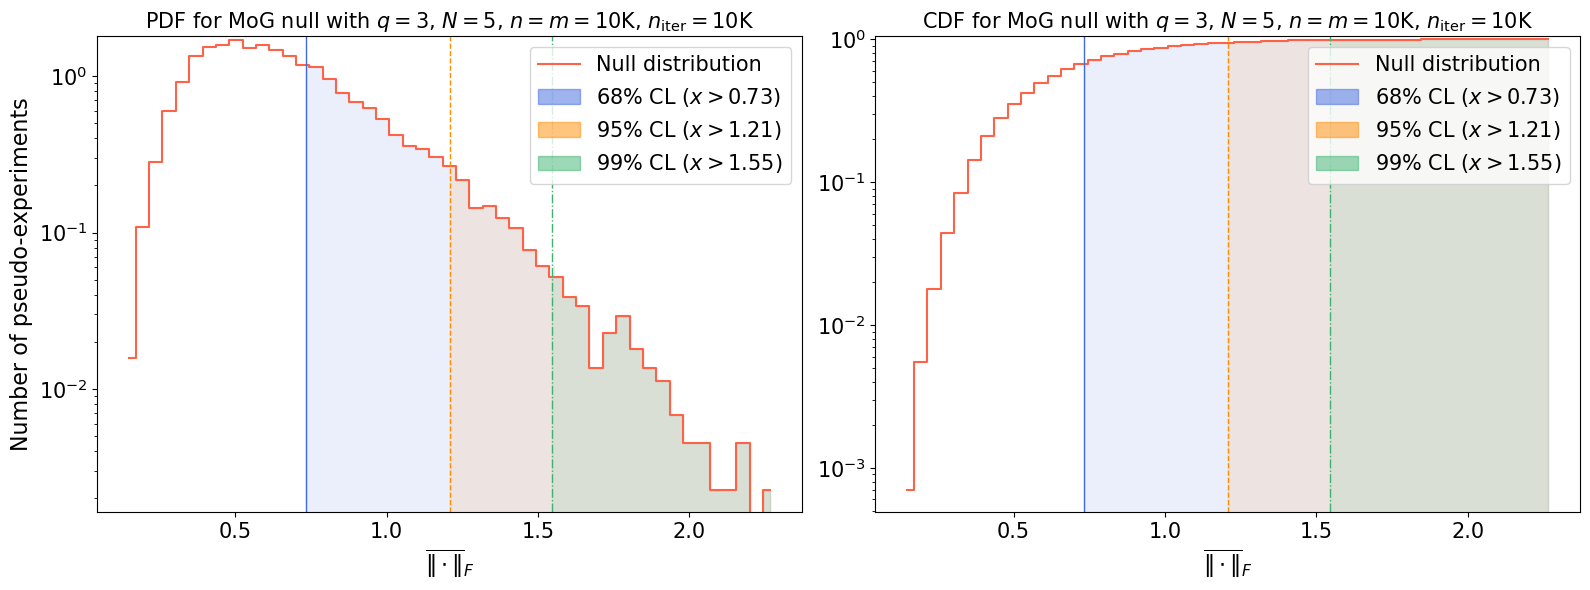

Time elapsed: 1.8514524019847158 seconds.
mu = 0.770602764568853 +/- 0.0021730387386782496
sigma = 0.4661586359468469 +/- 0.005199763058060316


/tmp/ipykernel_14140/1790634705.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_14140/1790634705.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_14140/1790634705.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_14140/1790634705.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


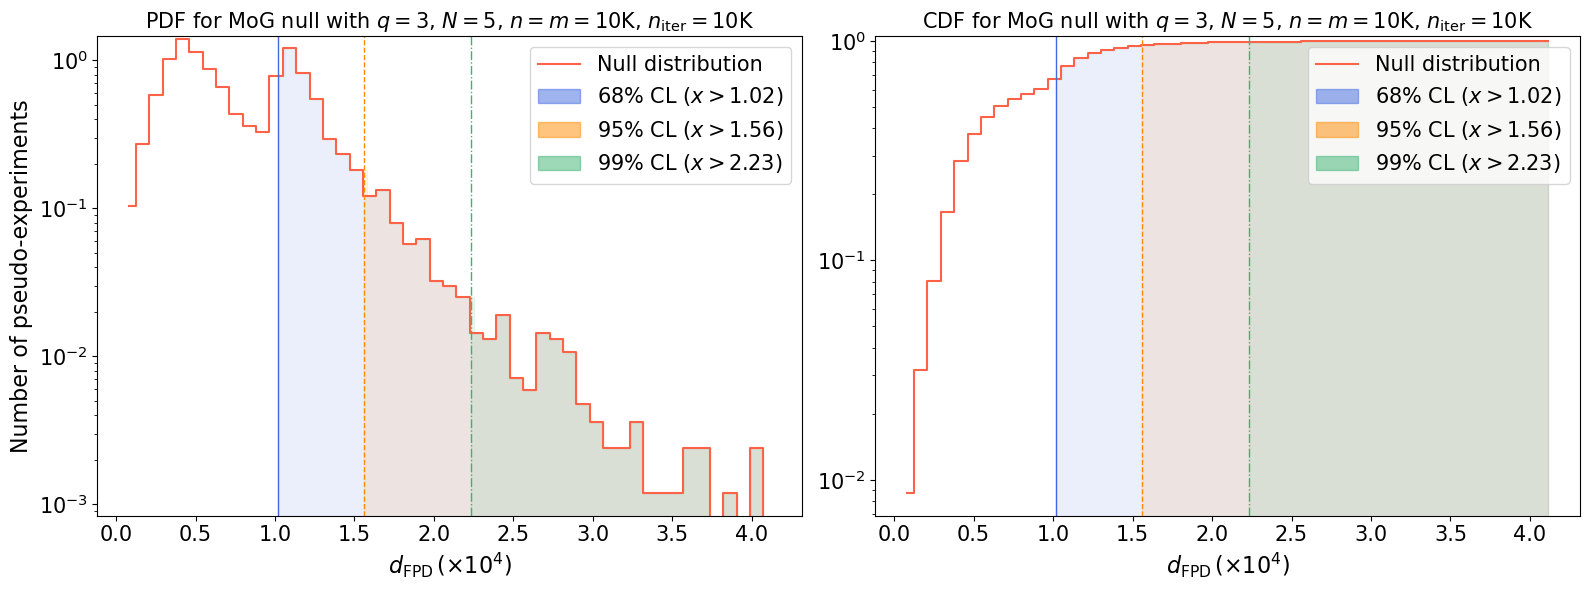

Time elapsed: 1.3256963299936615 seconds.
mu = 0.0525304685094742 +/- 0.00012449732674414096
sigma = 0.11157837010108229 +/- 0.001860578138442794


/tmp/ipykernel_14140/1790634705.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_14140/1790634705.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_14140/1790634705.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


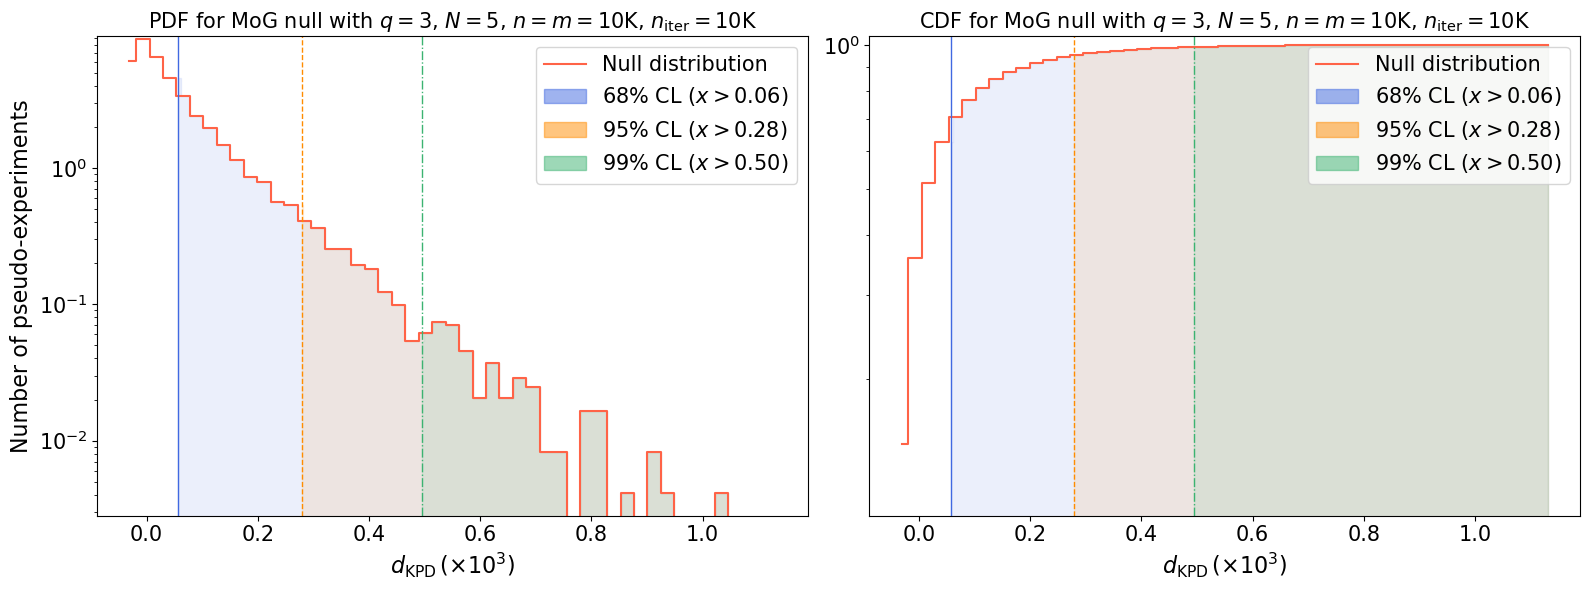

Time elapsed: 1.1492033780086786 seconds.
mu = 0.8657148748552179 +/- 0.00021165357583810118
sigma = 0.1454831866017861 +/- 0.001284495140076281


/tmp/ipykernel_14140/1790634705.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_14140/1790634705.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_14140/1790634705.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_14140/1790634705.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


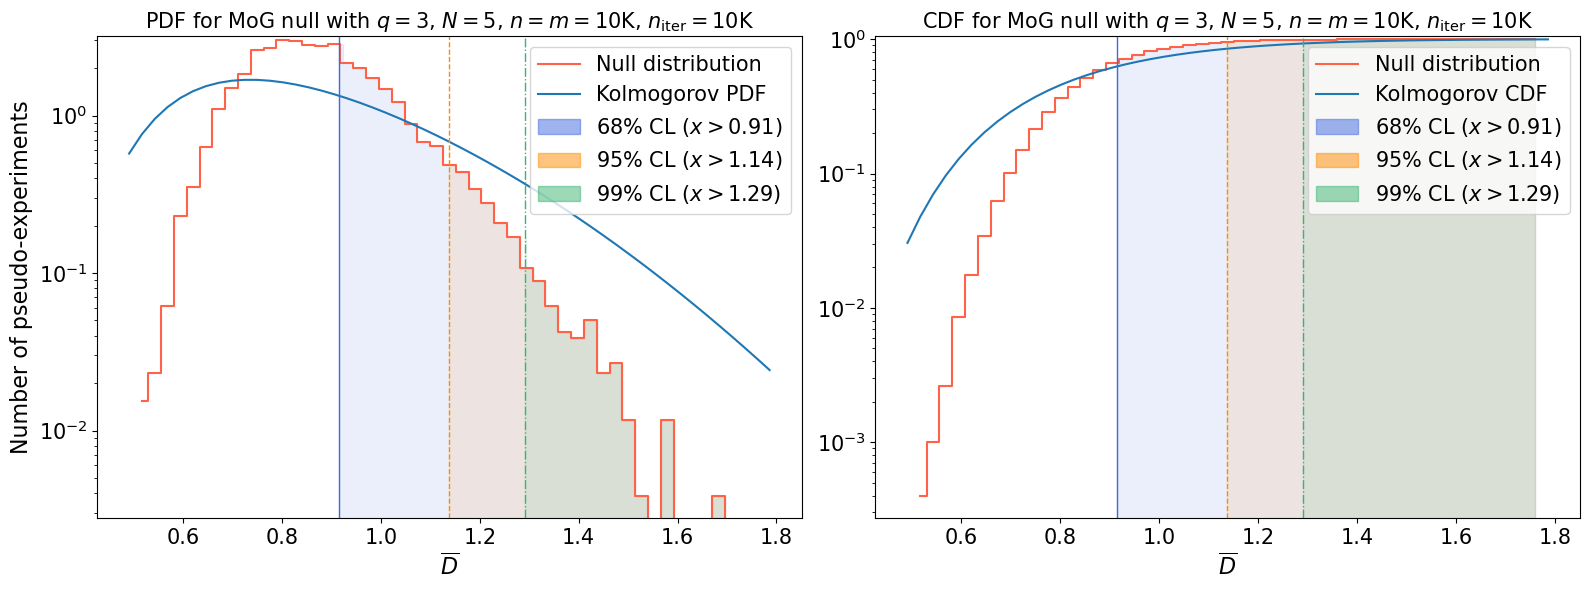

Time elapsed: 1.3308771169977263 seconds.
mu = 0.8641125120923411 +/- 0.00017197174905408282
sigma = 0.13113799947158064 +/- 0.0012591139555934523


/tmp/ipykernel_14140/1790634705.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_14140/1790634705.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_14140/1790634705.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_14140/1790634705.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


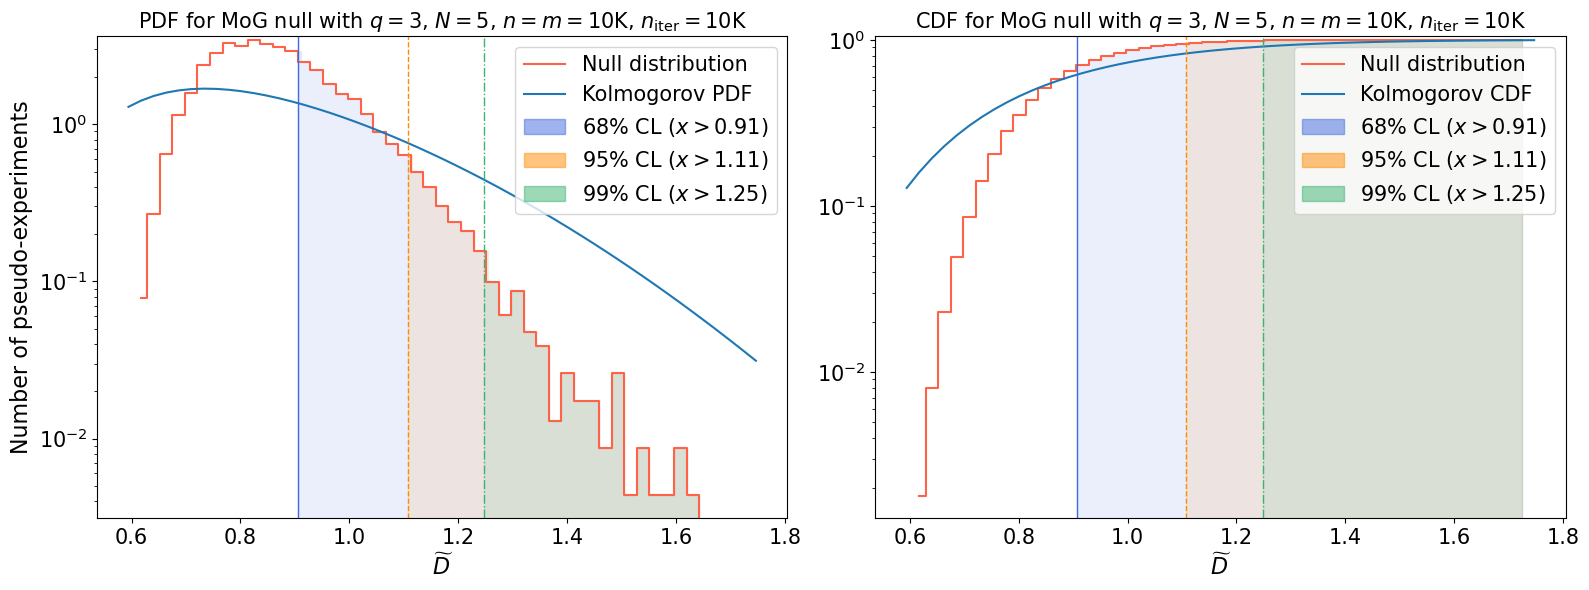

Time elapsed: 1.5353009969985578 seconds.
mu = 0.6313776278332932 +/- 0.0003306436220491978
sigma = 0.18183608609107207 +/- 0.0018016528739258479


/tmp/ipykernel_14140/1790634705.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_14140/1790634705.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_14140/1790634705.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_14140/1790634705.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


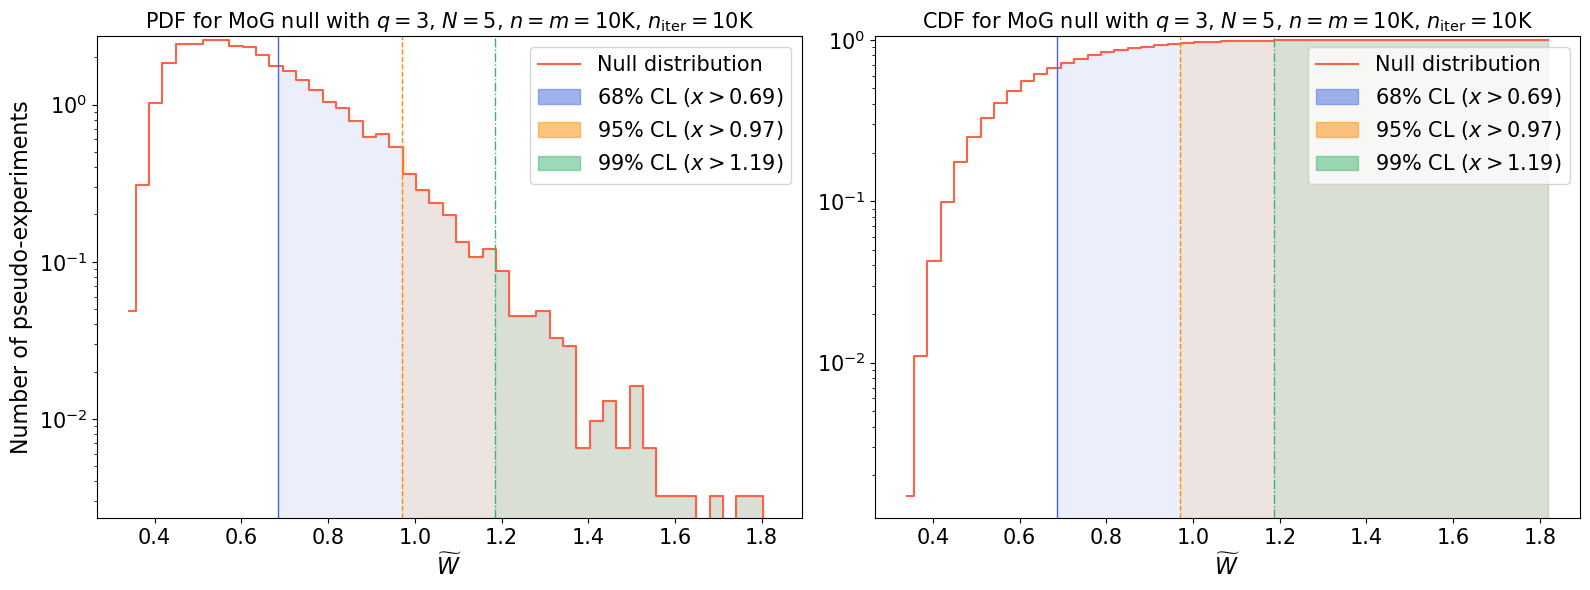

Time elapsed: 1.3218030729913153 seconds.


name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f86fcd0f010>   
1          metric_list  <function <lambda> at 0x7f86fcd0fbe0>   
2          metric_list  <function <lambda> at 0x7f86f4114ca0>   
3      statistic_means  <function <lambda> at 0x7f86f4114d30>   
4         metric_means  <function <lambda> at 0x7f86f4114dc0>   
5         metric_means  <function <lambda> at 0x7f86f4114e50>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f86f4114ee0>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1             lambda ns, ndims: 10_000   
2              lambda ns, ndims: 1_000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 10000, 'ba...           5000   
1  {'niter': 10000, 'batch_size_test': 10000, 'ba...           1000   
2  {'niter': 10000, 'batch_size_test': 10000, 'ba...             10   
3  {'niter': 10000, 'batch_size_test': 10000, 'ba...          10000   
4  {'niter': 10000, 'batch_size_test': 10000, 'ba...            500   
5  {'niter': 10000, 'batch_size_test': 10000, 'ba...            500   
6  {'niter': 10000, 'batch_size_test': 10000, 'ba...           2000   

                        latex                                   null_file  \
0  $\overline{\|\cdot\|}_{F}$   ../results/5D_10K/null_hypothesis/FN.json   
1          $d_{\mathrm{FPD}}$  ../results/5D_10K/null_hypothesis/FPD.json   
2          $d_{\mathrm{KPD}}$  ../results/5D_10K/null_hypothesis/KPD.json   
3              $\overline{D}$   ../results/5D_10K/null_hypothesis/KS.json   
4             $\widetilde{D}$  ../results/5D_10K/null_hypothesis/SKS.json   
5             $\widetilde{W}$  ../results/5D_10K/null_hypothesis/SWD.json   
6                   $t_{\mu}$   ../results/5D_10K/null_hypothesis/LR.json   

                                          thresholds  \
0  [[0.68, [6800, 3199], 0.7325348105633029], [0....   
1  [[0.68, [6800, 3199], 1.0175550386551708], [0....   
2  [[0.68, [6800, 3199], 0.05742642381001417], [0...   
3  [[0.68, [6800, 3199], 0.9149967015224115], [0....   
4  [[0.68, [6800, 3199], 0.9062283657910839], [0....   
5  [[0.68, [6800, 3199], 0.685356499154083], [0.9...   
6                                                 []   

                                 null_figure  
0   ../results/5D_10K/null_hypothesis/FN.pdf  
1  ../results/5D_10K/null_hypothesis/FPD.pdf  
2  ../results/5D_10K/null_hypothesis/KPD.pdf  
3   ../results/5D_10K/null_hypothesis/KS.pdf  
4  ../results/5D_10K/null_hypothesis/SKS.pdf  
5  ../results/5D_10K/null_hypothesis/SWD.pdf  
6                                        NaN

In [10]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    if "FPD" in latex:
        latex = r"$d_{\mathrm{FPD}}\,(\times 10^{4})$"
    elif "KPD" in latex:
        latex = r"$d_{\mathrm{KPD}}\,(\times 10^{3})$"
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [11]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [12]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [13]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 5.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Exclusion limits for fn with both deformation already loaded.
Exclusion limits for fpd with mean deformation already loaded.
Exclusion limits for fpd with std deformation already loaded.
Exclusion limits for fpd with both deformation already loaded.
Exclusion limits for kpd with mean deformation already loaded.
Exclusion limits for kpd with std deformation already loaded.
Exclusion limits for kpd with both deformation already loaded.
Exclusion limits for ks with mean deformation already loaded.
Exclusion limits for ks with std deformation already loaded.
Exclusion limits for ks with both deformation already loaded.
Exclusion limits for sks with mean deformation already loaded.
Exclusion limits for sks with std deformation already loaded.
Exclusion limits for sks with both deformation already loaded.
Exclusion limits for swd with mean deformation already loaded.
Exc

### Likelihood-ratio test

In [14]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [15]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Exclusion limits for LR with mean deformation already loaded.
Exclusion limits for LR with std deformation already loaded.
Exclusion limits for LR with both deformation already loaded.
dict_keys(['2024-04-09T08:17:32.047183', '2024-04-09T12:48:49.241300', '2024-04-09T12:58:18.440799', '2024-04-09T13:07:20.008483', '2024-04-09T13:17:25.561745', '2024-04-09T13:25:56.283172', '2024-04-09T13:35:25.934319', '2024-04-09T13:44:04.744309', '2024-04-09T13:50:02.052651', '2024-04-09T13:58:47.407373', '2024-04-09T14:11:47.394617', '2024-04-09T14:23:42.318644', '2024-04-09T14:35:11.864245', '2024-04-09T14:47:31.477052', '2024-04-09T14:59:13.151367', '2024-04-09T15:11:20.411686', '2024-04-09T15:20:01.727259', '2024-04-09T15:28:01.572144', '2024-04-09T23:46:24.382607', '2024-04-10T00:10:07.236509', '2024-04-10T00:29:45.394176'])


### Show and save results

In [16]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


In [17]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [18]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
18        lr        mean    5  10000                10000   
9         ks        mean    5  10000                10000   
12       sks        mean    5  10000                10000   
15       swd        mean    5  10000                10000   
0         fn        mean    5  10000                10000   
3        fpd        mean    5  10000                10000   
6        kpd        mean    5  10000                10000   

    $\epsilon^{\mu}_{95\%\mathrm{CL}}$  $\epsilon^{\mu}_{99\%\mathrm{CL}}$  \
18                             0.00115                             0.00157   
9                              0.00904                             0.01266   
12                             0.02708                             0.03665   
15                             0.04593                             0.06437   
0                              0.05875                             0.08257   
3                              0.07675                             0.10169   
6                              0.11627                             0.15741   

    $t^{\mu}$ (s)  
18           1422  
9             779  
12            739  
15            521  
0             630  
3             605  
6             518

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
18        lr                             0.00115   
9         ks                             0.00904   
12       sks                             0.02708   
15       swd                             0.04593   
0         fn                             0.05875   
3        fpd                             0.07675   
6        kpd                             0.11627   

    $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  
18                             0.00157           1422  
9                              0.01266            779  
12                             0.03665            739  
15                             0.06437            521  
0                              0.08257            630  
3                              0.10169            605  
6                              0.15741            518

In [19]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
19        lr         std    5  10000                10000   
10        ks         std    5  10000                10000   
13       sks         std    5  10000                10000   
16       swd         std    5  10000                10000   
1         fn         std    5  10000                10000   
4        fpd         std    5  10000                10000   
7        kpd         std    5  10000                10000   

    $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19                                0.00140   
10                                0.02007   
13                                0.05569   
16                                0.09308   
1                                 0.15320   
4                                 0.15930   
7                                 2.46582   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00212              1178  
10                                0.02820               714  
13                                0.07833               701  
16                                0.13201               479  
1                                 0.23721               569  
4                                 0.22253               510  
7                                 2.77764               357

Statistic  $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19        lr                                0.00140   
10        ks                                0.02007   
13       sks                                0.05569   
16       swd                                0.09308   
1         fn                                0.15320   
4        fpd                                0.15930   
7        kpd                                2.46582   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00212              1178  
10                                0.02820               714  
13                                0.07833               701  
16                                0.13201               479  
1                                 0.23721               569  
4                                 0.22253               510  
7                                 2.77764               357

In [20]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
20        lr        both    5  10000                10000   
11        ks        both    5  10000                10000   
14       sks        both    5  10000                10000   
17       swd        both    5  10000                10000   
2         fn        both    5  10000                10000   
5        fpd        both    5  10000                10000   
8        kpd        both    5  10000                10000   

    $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20                                    0.00091   
11                                    0.00761   
14                                    0.02327   
17                                    0.04135   
2                                     0.05264   
5                                     0.06866   
8                                     0.11810   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00126                  1316  
11                                    0.01054                   689  
14                                    0.03132                   727  
17                                    0.05785                   561  
2                                     0.07529                   541  
5                                     0.09425                   569  
8                                     0.15922                   525

Statistic  $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20        lr                                    0.00091   
11        ks                                    0.00761   
14       sks                                    0.02327   
17       swd                                    0.04135   
2         fn                                    0.05264   
5        fpd                                    0.06866   
8        kpd                                    0.11810   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00126                  1316  
11                                    0.01054                   689  
14                                    0.03132                   727  
17                                    0.05785                   561  
2                                     0.07529                   541  
5                                     0.09425                   569  
8                                     0.15922                   525

In [22]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
0          $t_{\mathrm{LLR}}$                             0.00115   
1              $\overline{D}$                             0.00904   
2             $\widetilde{D}$                             0.02708   
3             $\widetilde{W}$                             0.04593   
4  $\overline{\|\cdot\|}_{F}$                             0.05875   
5          $d_{\mathrm{FPD}}$                             0.07675   
6          $d_{\mathrm{KPD}}$                             0.11627   

   $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  \
0                             0.00157           1422   
1                             0.01266            779   
2                             0.03665            739   
3                             0.06437            521   
4                             0.08257            630   
5                             0.10169            605   
6                             0.15741            518   

   $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
0                                0.00140   
1                                0.02007   
2                                0.05569   
3                                0.09308   
4                                0.15320   
5                                0.15930   
6                                2.46582   

   $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  \
0                                0.00212              1178   
1                                0.02820               714   
2                                0.07833               701   
3                                0.13201               479   
4                                0.23721               569   
5                                0.22253               510   
6                                2.77764               357   

   $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
0                                    0.00091   
1                                    0.00761   
2                                    0.02327   
3                                    0.04135   
4                                    0.05264   
5                                    0.06866   
6                                    0.11810   

   $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  \
0                                    0.00126                  1316   
1                                    0.01054                   689   
2                                    0.03132                   727   
3                                    0.05785                   561   
4                                    0.07529                   541   
5                                    0.09425                   569   
6                                    0.15922                   525   

  $t^{\mathrm{null}}$ (s)  
0                       -  
1                      59  
2                     826  
3                     422  
4                      30  
5                     439  
6                    2197

\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 0.0011 & 0.0016 & 1422 & 0.0014 & 0.0021 & 1178 & 0.00091 & 0.0013 & 1316 & - \\
$\overline{D}$ & 0.009 & 0.013 & 779 & 0.02 & 0.028 & 714 & 0.0076 & 0.011 & 689 & 59 \\
$\widetilde{D}$ & 0.027 & 0.037 & 739 & 0.056 & 0.078 & 701 & 0.023 & 0.031 & 727 & 826 \\
$\widetilde{W}$ & 0.046 & 0.064 & 521 & 0.093 & 0.13 & 479 & 0.041 & 0.058 & 561 & 422 \\
$\overline{\|\cdot\|}_{F}$ & 0.059 & 0.083 & 630 & 0.15 & 0.24 & 569 & 0.053 & 0.075 & 541 & 30 \\
$d_{\mathrm{FPD}}$ & 0.077 & 0.1 & 605 & 0.16 & 0.22 & 510 & 0.069 & 0.094 & 569 & 439 \\
$d_{\mathrm{KPD}}$ & 0.12 & 0.16 & 518 & 2.5 & 2.

# Fixed $n=20000$

## Null hypotheses

### Model definition

In [2]:
batch_size_test = 20_000

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)


In [3]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [4]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 200000000
batch_size 20000
niter 10000
niter * batch_size 200000000
small_sample False


In [5]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 10_000,
                               num_batches = 1,
                               batch_size = 20_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [6]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

niter  batch_size_test  batch_size_gen  small_sample_threshold dtype_input  \
0  10000            20000           10000                10000000     float64   

   seed  use_tf  mirror_strategy strategy  verbose  ...  ndims_1  nsamples_1  \
0     0    True            False     None     True  ...        5           0   

   is_symb_2  ndims_2  nsamples_2    dtype ndims   nsamples  small_sample  \
0       True        5           0  float64     5  200000000         False   

   ncomp  
0      3  

[1 rows x 21 columns]

In [7]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                      "object_name": "FNMetric",
                                      "class_name": "GMetrics.FNMetric",
                                      "kwargs": {},
                                      "result_key": "metric_list", 
                                      "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                      "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                      "test_config": test_config_null,
                                      "max_vectorize": 2000, # optimized for 5D
                                      "latex": "$\overline{\|\cdot\|}_{F}$",
                                      "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500, # optimized for 5D
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1, # optimized for 5D
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 5000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 20000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 5,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 5,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 5,
   'nsamples': 200000000,
   'small_sample': False,
   'ncomp': 3},
  'max_vectorize': 2000,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results/5D_20K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_key': 'metr

### Evaluate null hypotheses

In [8]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from ../results/5D_20K/null_hypothesis/FN.json
Loading fpd from ../results/5D_20K/null_hypothesis/FPD.json
Computing and savng kpd with max_vectorize = 1

------------------------------------------
Starting KPD metric calculation...
Running TF KPD calculation...
niter = 10000
batch_size = 20000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.


nchunks = 10000
Iterating from 0 to 1 out of 10000 .
Computing (Tensor("while/Placeholder:0", shape=(), dtype=int32),Tensor("while/while/Placeholder:0", shape=(), dtype=int32)) component
Iterating from 1 to 2 out of 10000 .
Iterating from 2 to 3 out of 10000 .
Iterating from 3 to 4 out of 10000 .
Iterating from 4 to 5 out of 10000 .
Iterating from 5 to 6 out of 10000 .
Iterating from 6 to 7 out of 10000 .
Iterating from 7 to 8 out of 10000 .
Iterating from 8 to 9 out of 10000 .
Iterating from 9 to 10 out of 10000 .
Iterating from 10 to 11 out of 10000 .
Iterating from 11 to 12 out of 10000 .
Iterating from 12 to 13 out of 10000 .
Iterating from 13 to 14 out of 10000 .
Iterating from 14 to 15 out of 10000 .
Iterating from 15 to 16 out of 10000 .
Iterating from 16 to 17 out of 10000 .
Iterating from 17 to 18 out of 10000 .
Iterating from 18 to 19 out of 10000 .
Iterating from 19 to 20 out of 10000 .
Iterating from 20 to 21 out of 10000 .
Iterating from 21 to 22 out of 10000 .
Iterating f

In [9]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.7273971147598925], [0.95, [9500, 500], 1.1976979866809125], [0.99, [9900, 100], 1.5272186802671115]]
Computing time for metric fn: 36.711499811994145
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.7603198140599615], [0.95, [9500, 500], 1.0564703611749042], [0.99, [9900, 100], 1.3860494412310478]]
Computing time for metric fpd: 606.7347321969864
ThresholdS for metric kpd: [[0.68, [6800, 3199], 0.3039724341280525], [0.95, [9500, 500], 1.302956129920485], [0.99, [9900, 100], 2.3135020940445727]]
Computing time for metric kpd: 21885.26378197901
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9160017967224121], [0.95, [9500, 500], 1.1319997906684875], [0.99, [9900, 100], 1.309000849723816]]
Computing time for metric ks: 73.37600612200913
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9108503349125385], [0.95, [9500, 500], 1.1089506559073925], [0.99, [9900, 100], 1.2629506178200245]]
Computing time for metric sks: 1429.8128464320034

name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f0ec556b490>   
1          metric_list  <function <lambda> at 0x7f0ec556bb50>   
2          metric_list  <function <lambda> at 0x7f0eb8728b80>   
3      statistic_means  <function <lambda> at 0x7f0eb8728c10>   
4         metric_means  <function <lambda> at 0x7f0eb8728ca0>   
5         metric_means  <function <lambda> at 0x7f0eb8728d30>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f0eb8728dc0>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1              lambda ns, ndims: 10000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 20000, 'ba...           2000   
1  {'niter': 10000, 'batch_size_test': 20000, 'ba...            500   
2  {'niter': 10000, 'batch_size_test': 20000, 'ba...              1   
3  {'niter': 10000, 'batch_size_test': 20000, 'ba...           5000   
4  {'niter': 10000, 'batch_size_test': 20000, 'ba...            200   
5  {'niter': 10000, 'batch_size_test': 20000, 'ba...            200   
6  {'niter': 10000, 'batch_size_test': 20000, 'ba...           1000   

                        latex                                   null_file  \
0  $\overline{\|\cdot\|}_{F}$   ../results/5D_20K/null_hypothesis/FN.json   
1          $d_{\mathrm{FPD}}$  ../results/5D_20K/null_hypothesis/FPD.json   
2          $d_{\mathrm{KPD}}$  ../results/5D_20K/null_hypothesis/KPD.json   
3              $\overline{D}$   ../results/5D_20K/null_hypothesis/KS.json   
4             $\widetilde{D}$  ../results/5D_20K/null_hypothesis/SKS.json   
5             $\widetilde{W}$  ../results/5D_20K/null_hypothesis/SWD.json   
6                   $t_{\mu}$   ../results/5D_20K/null_hypothesis/LR.json   

                                          thresholds  
0  [[0.68, [6800, 3199], 0.7273971147598925], [0....  
1  [[0.68, [6800, 3199], 0.7603198140599615], [0....  
2  [[0.68, [6800, 3199], 0.3039724341280525], [0....  
3  [[0.68, [6800, 3199], 0.9160017967224121], [0....  
4  [[0.68, [6800, 3199], 0.9108503349125385], [0....  
5  [[0.68, [6800, 3199], 0.6885463628737355], [0....  
6                                                 []

### Plots of null-distributions

mu = 0.646109218928857 +/- 0.0008092928278313957
sigma = 0.284480724800714 +/- 0.0026860877510946277


/tmp/ipykernel_18751/3831742232.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_18751/3831742232.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_18751/3831742232.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_18751/3831742232.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


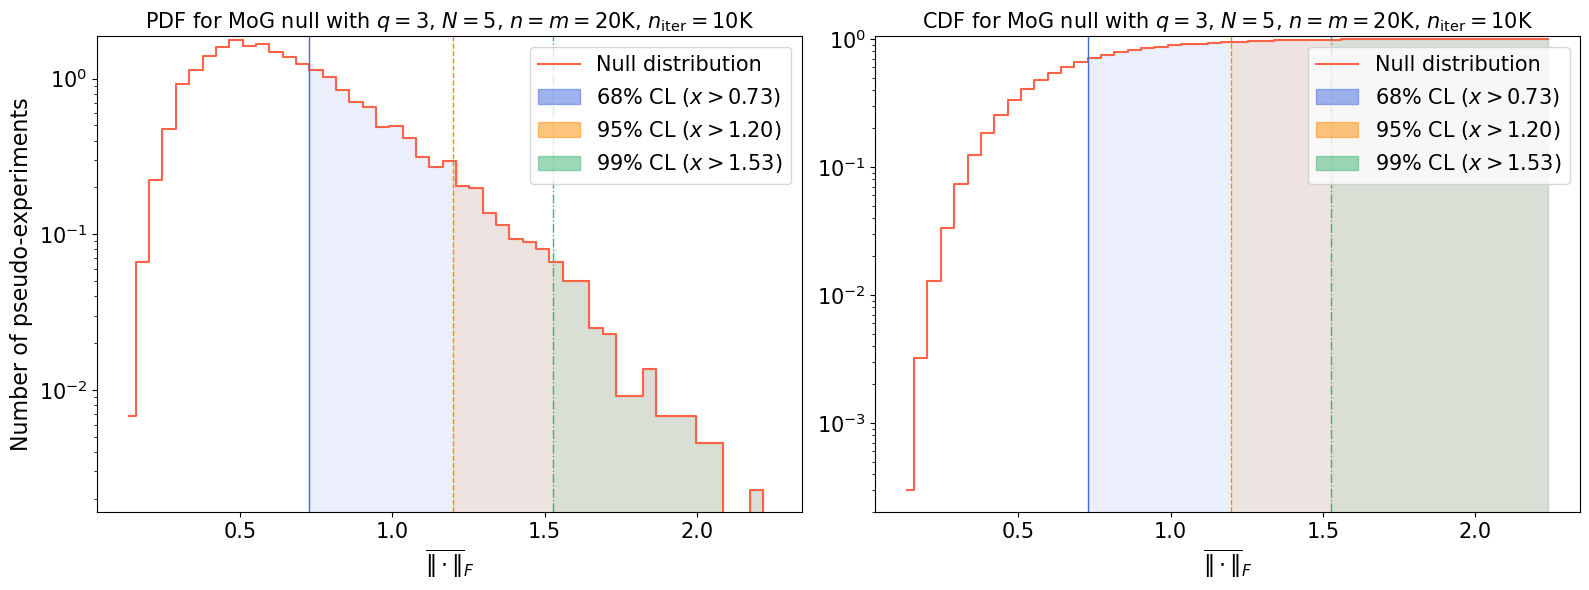

Time elapsed: 1.65878333200817 seconds.
mu = 0.7463154285759117 +/- 0.0002636776032112809
sigma = 0.16238152703164266 +/- 0.0028365875012072365


/tmp/ipykernel_18751/3831742232.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_18751/3831742232.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_18751/3831742232.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_18751/3831742232.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


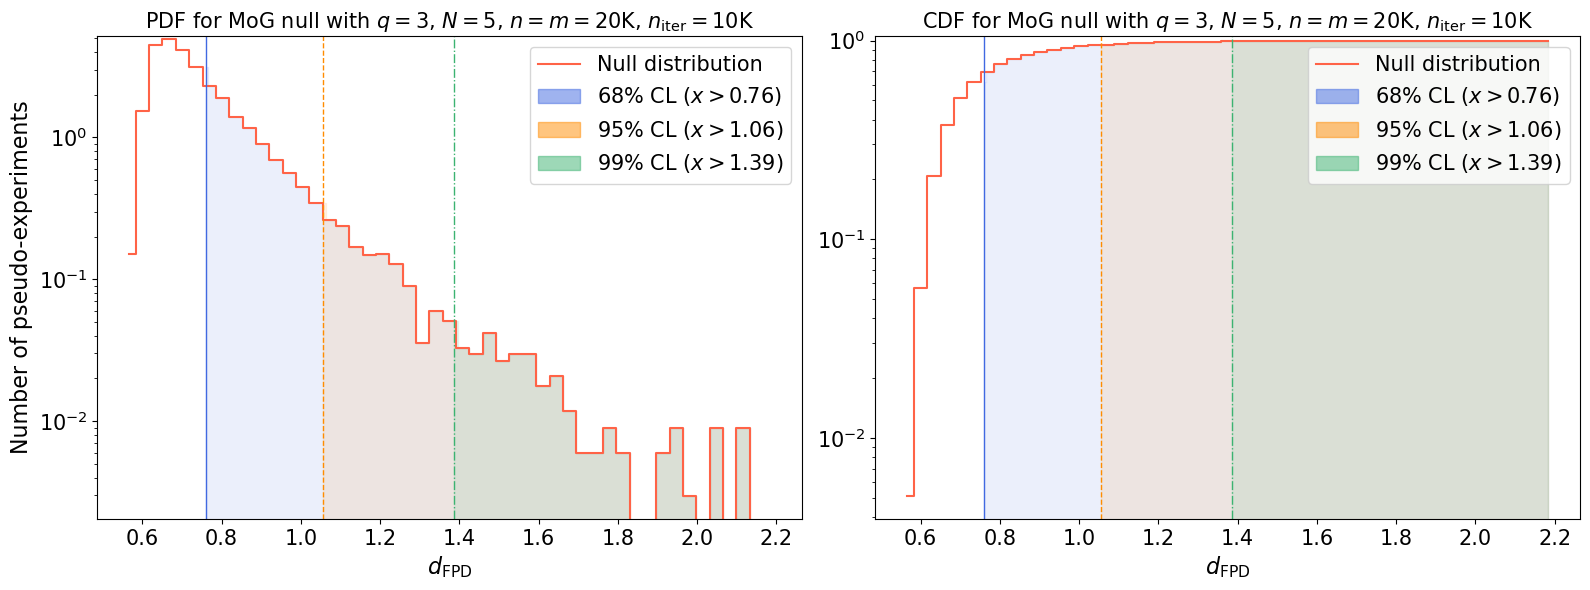

Time elapsed: 1.4706849189824425 seconds.
mu = 0.24312745888825993 +/- 0.0030465148556061477
sigma = 0.551952430523333 +/- 0.009044892096418728


/tmp/ipykernel_18751/3831742232.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_18751/3831742232.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_18751/3831742232.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_18751/3831742232.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


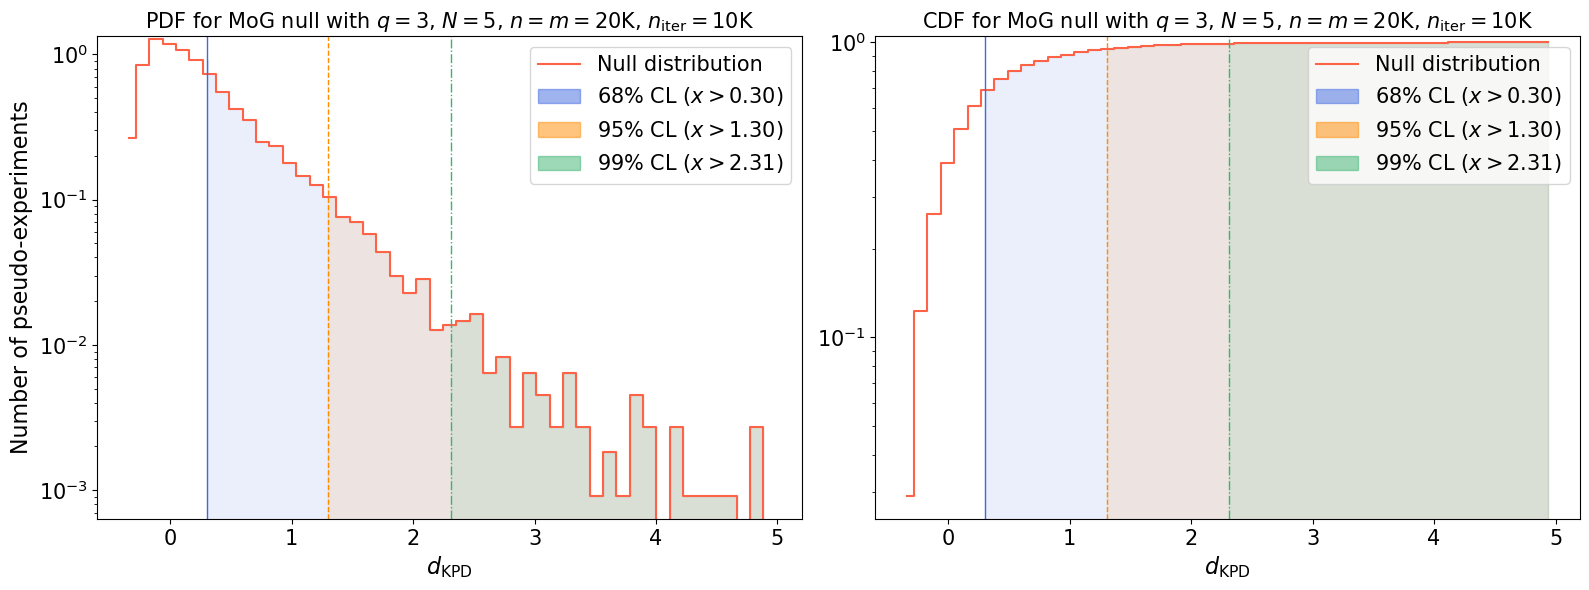

Time elapsed: 1.3365799879829865 seconds.
mu = 0.8673682661131025 +/- 0.00021150451882098395
sigma = 0.14543194931684852 +/- 0.001325720177430651


/tmp/ipykernel_18751/3831742232.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_18751/3831742232.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_18751/3831742232.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_18751/3831742232.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


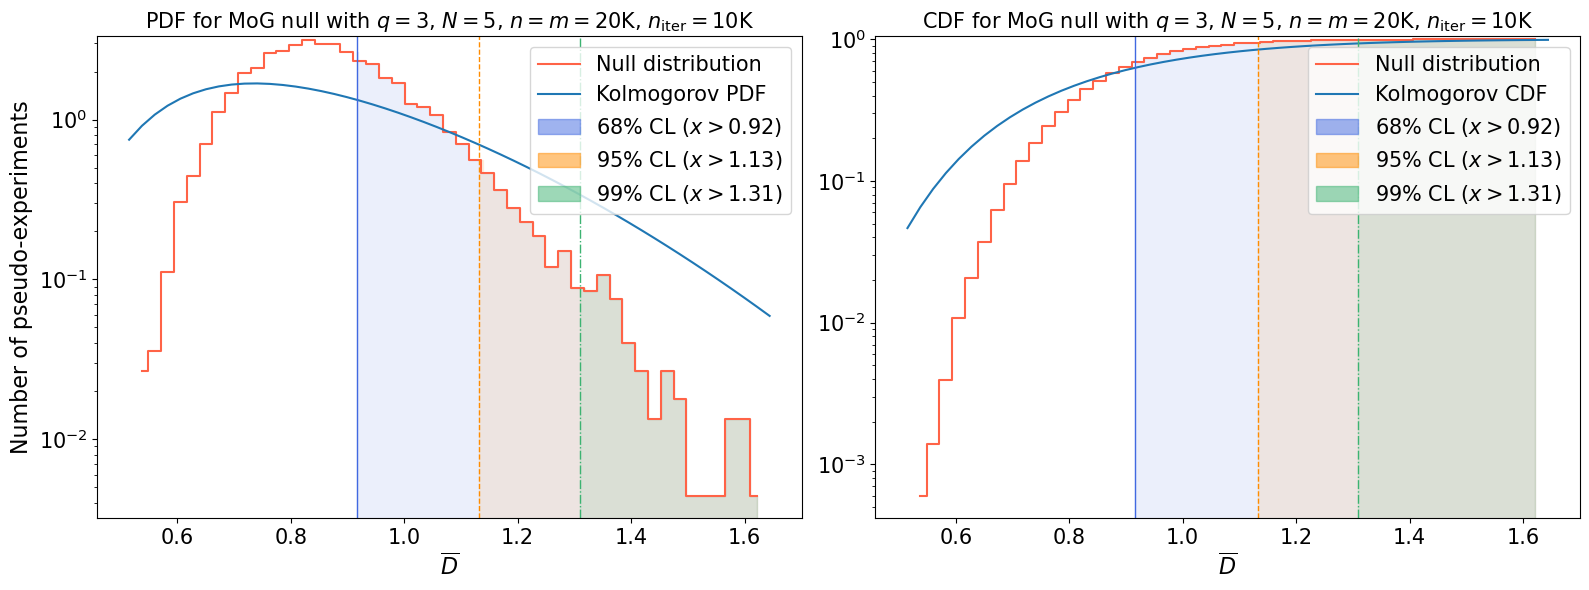

Time elapsed: 1.8884250959963538 seconds.
mu = 0.8683062179060653 +/- 0.00017048418516868815
sigma = 0.13056959261967854 +/- 0.0012143195048050744


/tmp/ipykernel_18751/3831742232.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_18751/3831742232.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_18751/3831742232.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_18751/3831742232.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


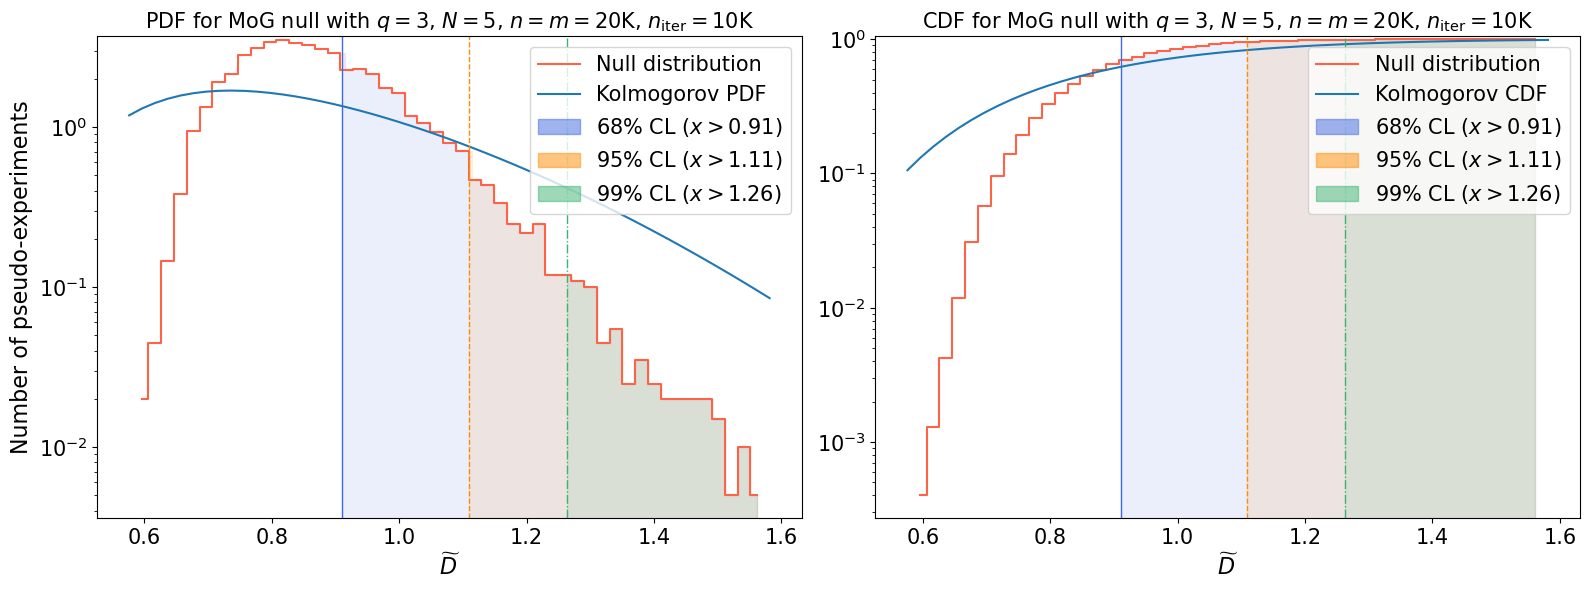

Time elapsed: 1.9714800989895593 seconds.
mu = 0.6356181715959718 +/- 0.00033254467156421927
sigma = 0.1823580740094113 +/- 0.0017555101172213273


/tmp/ipykernel_18751/3831742232.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_18751/3831742232.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_18751/3831742232.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_18751/3831742232.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


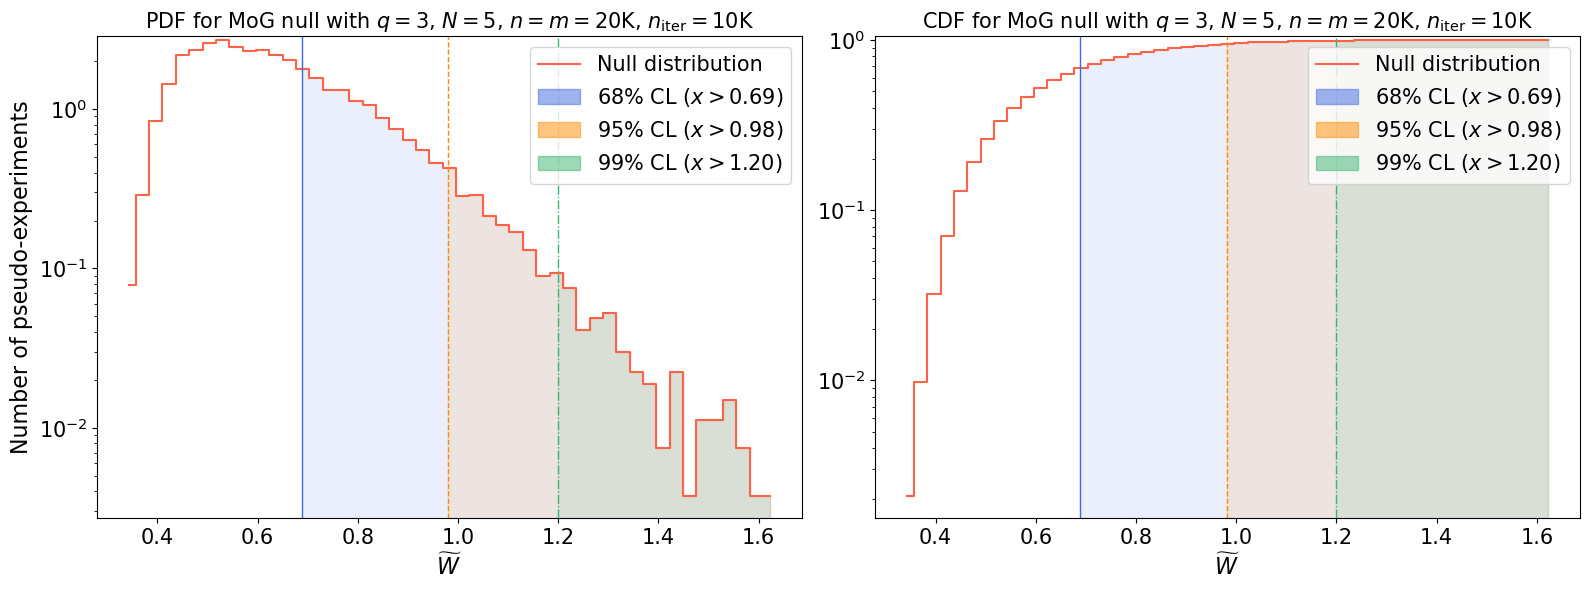

Time elapsed: 1.37400386101217 seconds.


name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f0ec556b490>   
1          metric_list  <function <lambda> at 0x7f0ec556bb50>   
2          metric_list  <function <lambda> at 0x7f0eb8728b80>   
3      statistic_means  <function <lambda> at 0x7f0eb8728c10>   
4         metric_means  <function <lambda> at 0x7f0eb8728ca0>   
5         metric_means  <function <lambda> at 0x7f0eb8728d30>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f0eb8728dc0>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1              lambda ns, ndims: 10000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 20000, 'ba...           2000   
1  {'niter': 10000, 'batch_size_test': 20000, 'ba...            500   
2  {'niter': 10000, 'batch_size_test': 20000, 'ba...              1   
3  {'niter': 10000, 'batch_size_test': 20000, 'ba...           5000   
4  {'niter': 10000, 'batch_size_test': 20000, 'ba...            200   
5  {'niter': 10000, 'batch_size_test': 20000, 'ba...            200   
6  {'niter': 10000, 'batch_size_test': 20000, 'ba...           1000   

                        latex                                   null_file  \
0  $\overline{\|\cdot\|}_{F}$   ../results/5D_20K/null_hypothesis/FN.json   
1          $d_{\mathrm{FPD}}$  ../results/5D_20K/null_hypothesis/FPD.json   
2          $d_{\mathrm{KPD}}$  ../results/5D_20K/null_hypothesis/KPD.json   
3              $\overline{D}$   ../results/5D_20K/null_hypothesis/KS.json   
4             $\widetilde{D}$  ../results/5D_20K/null_hypothesis/SKS.json   
5             $\widetilde{W}$  ../results/5D_20K/null_hypothesis/SWD.json   
6                   $t_{\mu}$   ../results/5D_20K/null_hypothesis/LR.json   

                                          thresholds  \
0  [[0.68, [6800, 3199], 0.7273971147598925], [0....   
1  [[0.68, [6800, 3199], 0.7603198140599615], [0....   
2  [[0.68, [6800, 3199], 0.3039724341280525], [0....   
3  [[0.68, [6800, 3199], 0.9160017967224121], [0....   
4  [[0.68, [6800, 3199], 0.9108503349125385], [0....   
5  [[0.68, [6800, 3199], 0.6885463628737355], [0....   
6                                                 []   

                                 null_figure  
0   ../results/5D_20K/null_hypothesis/FN.pdf  
1  ../results/5D_20K/null_hypothesis/FPD.pdf  
2  ../results/5D_20K/null_hypothesis/KPD.pdf  
3   ../results/5D_20K/null_hypothesis/KS.pdf  
4  ../results/5D_20K/null_hypothesis/SKS.pdf  
5  ../results/5D_20K/null_hypothesis/SWD.pdf  
6                                        NaN

In [10]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [11]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [12]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [13]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 5.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Computing exclusion limits for fn with mean deformation.

=============== fn - only mean ===============



------------ 1 ------------
eps = 2.5
statistic = 35.96611059119897 - next threshold = 1.1976979866809125 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.8710898551561488

------------ 2 ------------
eps = 1.25
statistic = 22.156472876202237 - next threshold = 1.1976979866809125 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.7948635395856565

------------ 3 ------------
eps = 0.625
statistic = 12.902214177616125 - next threshold = 1.1976979866809125 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.6602254048890737

------------ 4 ------------
eps = 0.3125
statistic = 6.952889265830589 - next threshold = 1.1976979866809125 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.412215120420013

------------ 5 ------------
eps = 0.15625
statistic = 3.6374773115586514 - next threshold = 1.1976979866809125 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.0091792642000121

------------ 6 ------------
eps = 0.078125
statistic = 1.

### Likelihood-ratio test

In [14]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [15]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Computing exclusion limits for lr with mean deformation.

=============== lr - only mean ===============

------------ 1 ------------
eps = 0.005
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 20000
nchunks = 10
Iterating from 0 to 1000 out of 10000 .


Iterating from 1000 to 2000 out of 10000 .
Iterating from 2000 to 3000 out of 10000 .
Iterating from 3000 to 4000 out of 10000 .
Iterating from 4000 to 5000 out of 10000 .
Iterating from 5000 to 6000 out of 10000 .
Iterating from 6000 to 7000 out of 10000 .
Iterating from 7000 to 8000 out of 10000 .
Iterating from 8000 to 9000 out of 10000 .
Iterating from 9000 to 10000 out of 10000 .
LR metric calculation completed in 38.07597344199894 seconds.
Saving lr to ../results/5D_20K/null_hypothesis/LR_mean_0.005000.json
ThresholdS: [[0.95, [9500, 500], -68.70869050228032], [0.99, [9900, 100], -56.85002727894647]]
Null distribution computed in 38.57172086299397 seconds
Evaluating alternative distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_sy

### Show and save results

In [16]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


In [17]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [18]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
18        lr        mean    5  10000                20000   
9         ks        mean    5  10000                20000   
12       sks        mean    5  10000                20000   
15       swd        mean    5  10000                20000   
0         fn        mean    5  10000                20000   
3        fpd        mean    5  10000                20000   
6        kpd        mean    5  10000                20000   

    $\epsilon^{\mu}_{95\%\mathrm{CL}}$  $\epsilon^{\mu}_{99\%\mathrm{CL}}$  \
18                             0.00076                             0.00106   
9                              0.00782                             0.01060   
12                             0.01930                             0.02622   
15                             0.03098                             0.04386   
0                              0.04349                             0.05967   
3                              0.04715                             0.06680   
6                              0.06866                             0.10027   

    $t^{\mu}$ (s)  
18           1679  
9             809  
12            773  
15            572  
0             630  
3             697  
6             741

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
18        lr                             0.00076   
9         ks                             0.00782   
12       sks                             0.01930   
15       swd                             0.03098   
0         fn                             0.04349   
3        fpd                             0.04715   
6        kpd                             0.06866   

    $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  
18                             0.00106           1679  
9                              0.01060            809  
12                             0.02622            773  
15                             0.04386            572  
0                              0.05967            630  
3                              0.06680            697  
6                              0.10027            741

In [19]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
19        lr         std    5  10000                20000   
10        ks         std    5  10000                20000   
13       sks         std    5  10000                20000   
16       swd         std    5  10000                20000   
4        fpd         std    5  10000                20000   
1         fn         std    5  10000                20000   
7        kpd         std    5  10000                20000   

    $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19                                0.00144   
10                                0.01732   
13                                0.03952   
16                                0.06058   
4                                 0.08881   
1                                 0.12634   
7                                 1.84082   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00195              1490  
10                                0.02348               673  
13                                0.05572               709  
16                                0.08801               535  
4                                 0.13017               702  
1                                 0.17572               538  
7                                 2.28199               544

Statistic  $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19        lr                                0.00144   
10        ks                                0.01732   
13       sks                                0.03952   
16       swd                                0.06058   
4        fpd                                0.08881   
1         fn                                0.12634   
7        kpd                                1.84082   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00195              1490  
10                                0.02348               673  
13                                0.05572               709  
16                                0.08801               535  
4                                 0.13017               702  
1                                 0.17572               538  
7                                 2.28199               544

In [20]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
20        lr        both    5  10000                20000   
11        ks        both    5  10000                20000   
14       sks        both    5  10000                20000   
17       swd        both    5  10000                20000   
2         fn        both    5  10000                20000   
5        fpd        both    5  10000                20000   
8        kpd        both    5  10000                20000   

    $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20                                    0.00071   
11                                    0.00669   
14                                    0.01610   
17                                    0.02632   
2                                     0.04105   
5                                     0.04166   
8                                     0.06866   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00095                  1633  
11                                    0.00894                   696  
14                                    0.02195                   754  
17                                    0.03771                   570  
2                                     0.05603                   620  
5                                     0.05997                   699  
8                                     0.10087                   751

Statistic  $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20        lr                                    0.00071   
11        ks                                    0.00669   
14       sks                                    0.01610   
17       swd                                    0.02632   
2         fn                                    0.04105   
5        fpd                                    0.04166   
8        kpd                                    0.06866   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00095                  1633  
11                                    0.00894                   696  
14                                    0.02195                   754  
17                                    0.03771                   570  
2                                     0.05603                   620  
5                                     0.05997                   699  
8                                     0.10087                   751

In [22]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
0          $t_{\mathrm{LLR}}$                             0.00076   
1              $\overline{D}$                             0.00782   
2             $\widetilde{D}$                             0.01930   
3             $\widetilde{W}$                             0.03098   
4  $\overline{\|\cdot\|}_{F}$                             0.04349   
5          $d_{\mathrm{FPD}}$                             0.04715   
6          $d_{\mathrm{KPD}}$                             0.06866   

   $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  \
0                             0.00106           1679   
1                             0.01060            809   
2                             0.02622            773   
3                             0.04386            572   
4                             0.05967            630   
5                             0.06680            697   
6                             0.10027            741   

   $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
0                                0.00144   
1                                0.01732   
2                                0.03952   
3                                0.06058   
4                                0.12634   
5                                0.08881   
6                                1.84082   

   $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  \
0                                0.00195              1490   
1                                0.02348               673   
2                                0.05572               709   
3                                0.08801               535   
4                                0.17572               538   
5                                0.13017               702   
6                                2.28199               544   

   $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
0                                    0.00071   
1                                    0.00669   
2                                    0.01610   
3                                    0.02632   
4                                    0.04105   
5                                    0.04166   
6                                    0.06866   

   $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  \
0                                    0.00095                  1633   
1                                    0.00894                   696   
2                                    0.02195                   754   
3                                    0.03771                   570   
4                                    0.05603                   620   
5                                    0.05997                   699   
6                                    0.10087                   751   

  $t^{\mathrm{null}}$ (s)  
0                       -  
1                      73  
2                    1429  
3                     926  
4                      36  
5                     606  
6                   21885

\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 0.00076 & 0.0011 & 1679 & 0.0014 & 0.0019 & 1490 & 0.00071 & 0.00095 & 1633 & - \\
$\overline{D}$ & 0.0078 & 0.011 & 809 & 0.017 & 0.023 & 673 & 0.0067 & 0.0089 & 696 & 73 \\
$\widetilde{D}$ & 0.019 & 0.026 & 773 & 0.04 & 0.056 & 709 & 0.016 & 0.022 & 754 & 1429 \\
$\widetilde{W}$ & 0.031 & 0.044 & 572 & 0.061 & 0.088 & 535 & 0.026 & 0.038 & 570 & 926 \\
$\overline{\|\cdot\|}_{F}$ & 0.043 & 0.06 & 630 & 0.13 & 0.18 & 538 & 0.041 & 0.056 & 620 & 36 \\
$d_{\mathrm{FPD}}$ & 0.047 & 0.067 & 697 & 0.089 & 0.13 & 702 & 0.042 & 0.06 & 699 & 606 \\
$d_{\mathrm{KPD}}$ & 0.069 & 0.1 & 741 & 1

# Fixed $n=50000$

## Null hypotheses

### Model definition

In [ ]:
batch_size_test = 50_000

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)


In [ ]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [ ]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...


Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 500000000
batch_size 50000
niter 10000
niter * batch_size 500000000
small_sample False


In [ ]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 10_000,
                               num_batches = 1,
                               batch_size = 50_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [ ]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

niter  batch_size_test  batch_size_gen  small_sample_threshold dtype_input  \
0  10000            50000           10000                10000000     float64   

   seed  use_tf  mirror_strategy strategy  verbose  ...  ndims_1  nsamples_1  \
0     0    True            False     None     True  ...        5           0   

   is_symb_2  ndims_2  nsamples_2    dtype ndims   nsamples  small_sample  \
0       True        5           0  float64     5  500000000         False   

   ncomp  
0      3  

[1 rows x 21 columns]

In [ ]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                      "object_name": "FNMetric",
                                      "class_name": "GMetrics.FNMetric",
                                      "kwargs": {},
                                      "result_key": "metric_list", 
                                      "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                      "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                      "test_config": test_config_null,
                                      "max_vectorize": 1000, # optimized for 5D
                                      "latex": "$\overline{\|\cdot\|}_{F}$",
                                      "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200, # optimized for 5D
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1, # optimized for 5D
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 50000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 5,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 5,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 5,
   'nsamples': 500000000,
   'small_sample': False,
   'ncomp': 3},
  'max_vectorize': 1000,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results_leonardo/5D_50K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_ke

### Evaluate null hypotheses

In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from ../results_leonardo/5D_50K/null_hypothesis/FN.json
Loading fpd from ../results_leonardo/5D_50K/null_hypothesis/FPD.json
Computing and savng kpd with max_vectorize = 1

------------------------------------------
Starting KPD metric calculation...
Running TF KPD calculation...
niter = 10000
batch_size = 50000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 10000
Iterating from 0 to 1 out of 10000 .


I0000 00:00:1712848522.167949 2598269 service.cc:145] XLA service 0xba40d210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712848522.168217 2598269 service.cc:153]   StreamExecutor device (0): NVIDIA A100-SXM-64GB, Compute Capability 8.0
W0000 00:00:1712848522.247539 2598269 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_1/Assert/Assert
W0000 00:00:1712848522.251328 2598269 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_3/Assert/Assert
W0000 00:00:1712848522.252252 2598269 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_5/Assert/Assert
W0000 00:00:1712848522.252565 2598269 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_7/Assert/Assert
W0000 00:00:1712848522.253474 2598269 assert_op.cc:38] Ignoring Assert operator while/M

Computing (Tensor("while/Placeholder:0", shape=(), dtype=int32),Tensor("while/while/Placeholder:0", shape=(), dtype=int32)) component
Iterating from 1 to 2 out of 10000 .
Iterating from 2 to 3 out of 10000 .
Iterating from 3 to 4 out of 10000 .
Iterating from 4 to 5 out of 10000 .
Iterating from 5 to 6 out of 10000 .
Iterating from 6 to 7 out of 10000 .
Iterating from 7 to 8 out of 10000 .
Iterating from 8 to 9 out of 10000 .
Iterating from 9 to 10 out of 10000 .
Iterating from 10 to 11 out of 10000 .
Iterating from 11 to 12 out of 10000 .
Iterating from 12 to 13 out of 10000 .
Iterating from 13 to 14 out of 10000 .
Iterating from 14 to 15 out of 10000 .
Iterating from 15 to 16 out of 10000 .
Iterating from 16 to 17 out of 10000 .
Iterating from 17 to 18 out of 10000 .
Iterating from 18 to 19 out of 10000 .
Iterating from 19 to 20 out of 10000 .
Iterating from 20 to 21 out of 10000 .
Iterating from 21 to 22 out of 10000 .
Iterating from 22 to 23 out of 10000 .
Iterating from 23 to 24 o

In [ ]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.7298814389654293], [0.95, [9500, 500], 1.194343275342383], [0.99, [9900, 100], 1.5257207752319304]]
Computing time for metric fn: 23.026496447157115
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.45283092579245954], [0.95, [9500, 500], 0.5406599898901173], [0.99, [9900, 100], 0.6272189852022225]]
Computing time for metric fpd: 175.1618712239433
ThresholdS for metric kpd: [[0.68, [6800, 3199], 0.26125275099655454], [0.95, [9500, 500], 0.3405622095279171], [0.99, [9900, 100], 0.3937468760378593]]
Computing time for metric kpd: 21290.91097209882
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9151610229957364], [0.95, [9500, 500], 1.132729974348813], [0.99, [9900, 100], 1.3022259312592006]]
Computing time for metric ks: 65.52993017807603
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9121602305718006], [0.95, [9500, 500], 1.1096755356387438], [0.99, [9900, 100], 1.2692760577053381]]
Computing time for metric sks: 538.613348825834

name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7fa892426ca0>   
1          metric_list  <function <lambda> at 0x7fa892426d40>   
2          metric_list  <function <lambda> at 0x7fa892426de0>   
3      statistic_means  <function <lambda> at 0x7fa892427100>   
4         metric_means  <function <lambda> at 0x7fa8924271a0>   
5         metric_means  <function <lambda> at 0x7fa892427240>   
6  lik_ratio_norm_list  <function <lambda> at 0x7fa8924272e0>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1              lambda ns, ndims: 10000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 50000, 'ba...           1000   
1  {'niter': 10000, 'batch_size_test': 50000, 'ba...            200   
2  {'niter': 10000, 'batch_size_test': 50000, 'ba...              1   
3  {'niter': 10000, 'batch_size_test': 50000, 'ba...           2000   
4  {'niter': 10000, 'batch_size_test': 50000, 'ba...            100   
5  {'niter': 10000, 'batch_size_test': 50000, 'ba...            100   
6  {'niter': 10000, 'batch_size_test': 50000, 'ba...            500   

                        latex  \
0  $\overline{\|\cdot\|}_{F}$   
1          $d_{\mathrm{FPD}}$   
2          $d_{\mathrm{KPD}}$   
3              $\overline{D}$   
4             $\widetilde{D}$   
5             $\widetilde{W}$   
6                   $t_{\mu}$   

                                           null_file  \
0  ../results_leonardo/5D_50K/null_hypothesis/FN....   
1  ../results_leonardo/5D_50K/null_hypothesis/FPD...   
2  ../results_leonardo/5D_50K/null_hypothesis/KPD...   
3  ../results_leonardo/5D_50K/null_hypothesis/KS....   
4  ../results_leonardo/5D_50K/null_hypothesis/SKS...   
5  ../results_leonardo/5D_50K/null_hypothesis/SWD...   
6  ../results_leonardo/5D_50K/null_hypothesis/LR....   

                                          thresholds  
0  [[0.68, [6800, 3199], 0.7298814389654293], [0....  
1  [[0.68, [6800, 3199], 0.45283092579245954], [0...  
2  [[0.68, [6800, 3199], 0.26125275099655454], [0...  
3  [[0.68, [6800, 3199], 0.9151610229957364], [0....  
4  [[0.68, [6800, 3199], 0.9121602305718006], [0....  
5  [[0.68, [6800, 3199], 0.689925739441241], [0.9...  
6                                                 []

### Plots of null-distributions

mu = 0.6508200052736014 +/- 0.0007990373971406097
sigma = 0.28267249550329615 +/- 0.002600462813563546


/tmp/ipykernel_2598269/1823599339.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2598269/1823599339.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2598269/1823599339.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2598269/1823599339.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


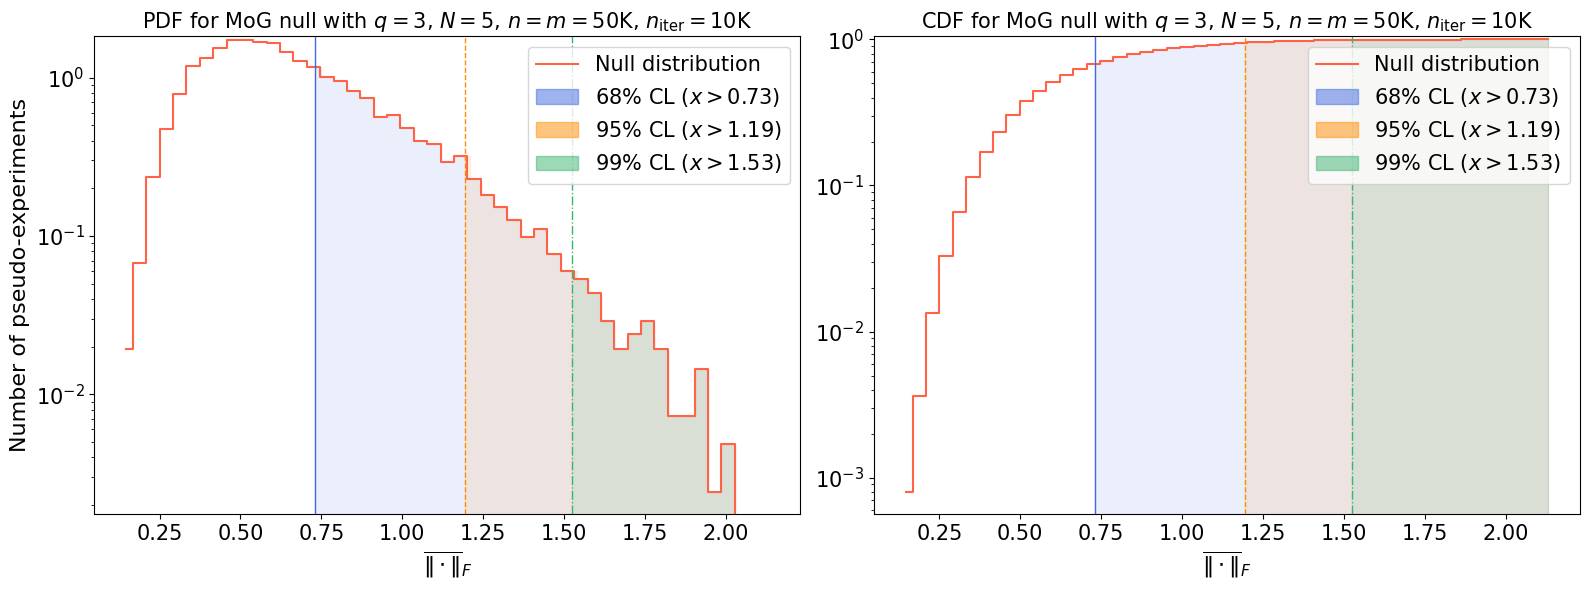

Time elapsed: 1.5053469175472856 seconds.
mu = 0.4486719672142794 +/- 2.3320974314924517e-05
sigma = 0.0482917946600916 +/- 0.000906739632955105


/tmp/ipykernel_2598269/1823599339.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2598269/1823599339.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2598269/1823599339.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2598269/1823599339.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


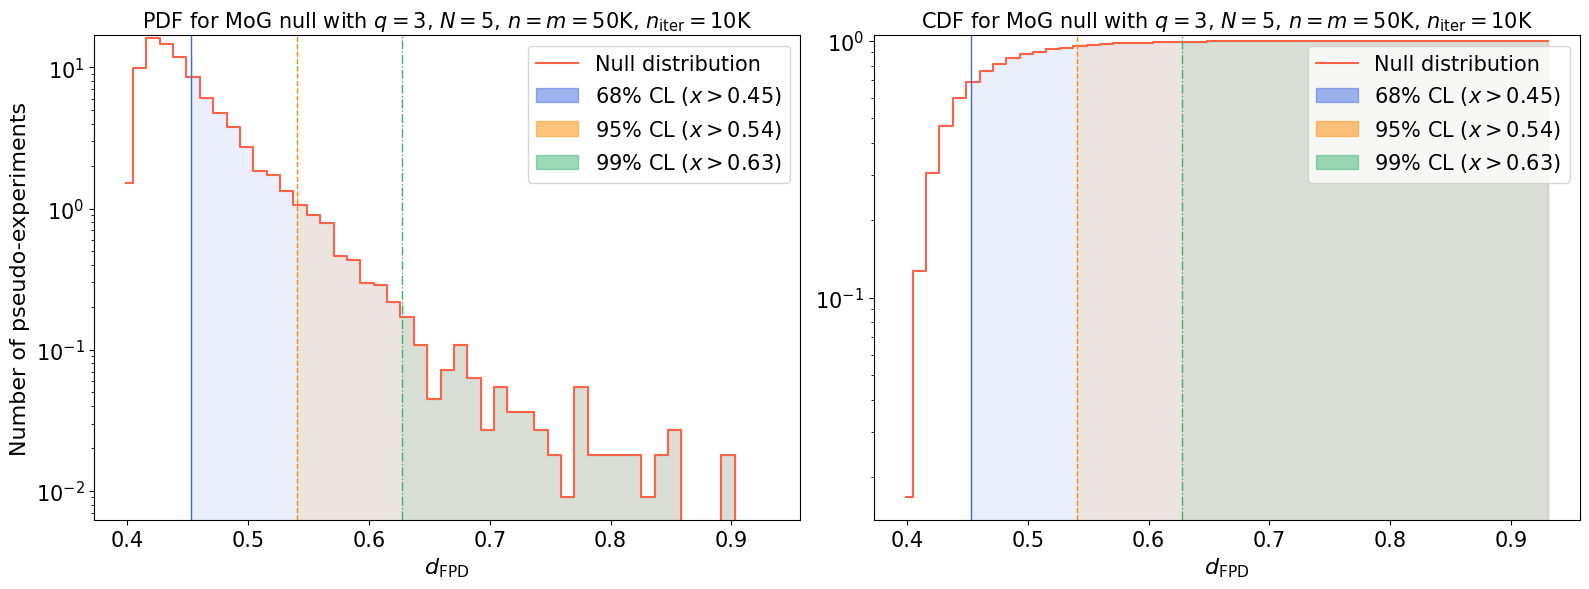

Time elapsed: 0.9294569715857506 seconds.
mu = 0.23526316883062617 +/- 3.794665829105511e-05
sigma = 0.06160085899649055 +/- 0.0004882661923778792


/tmp/ipykernel_2598269/1823599339.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2598269/1823599339.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2598269/1823599339.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2598269/1823599339.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


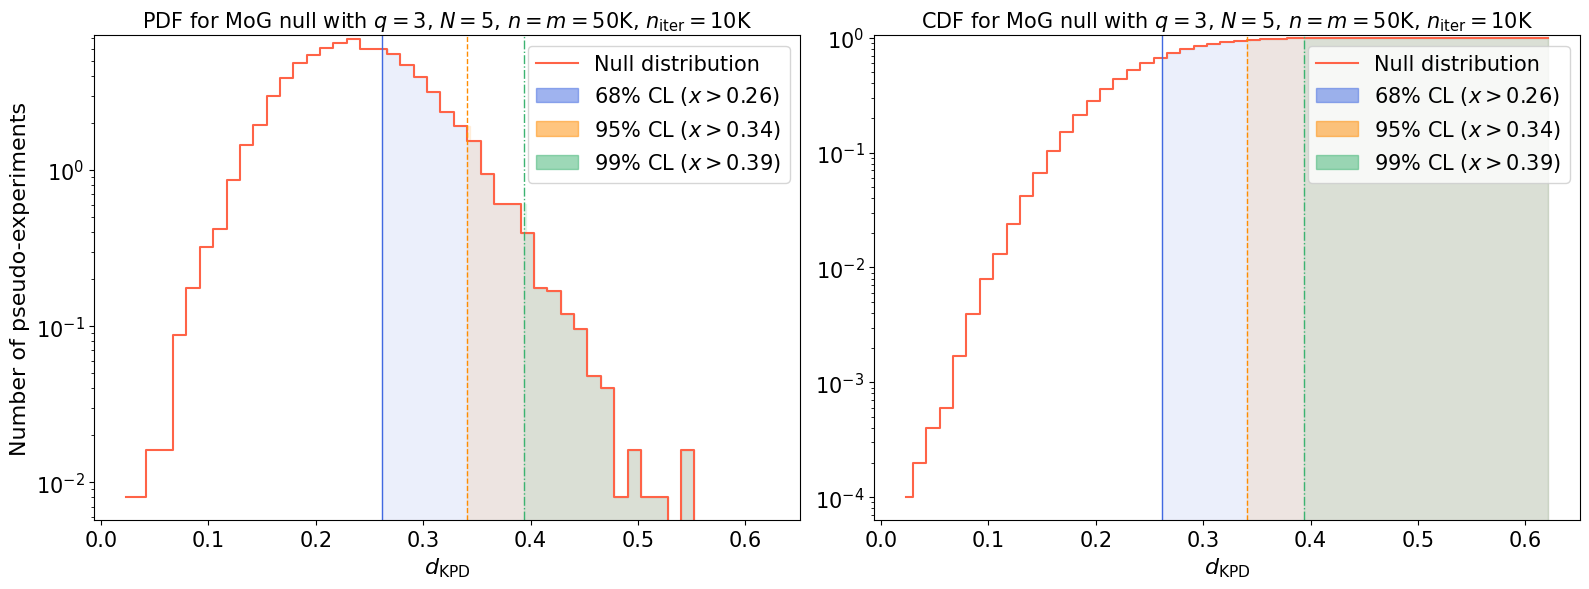

Time elapsed: 1.0353951742872596 seconds.
mu = 0.8671596004843392 +/- 0.00021271926894740018
sigma = 0.14584898660854664 +/- 0.0013058973980972959


/tmp/ipykernel_2598269/1823599339.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2598269/1823599339.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2598269/1823599339.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2598269/1823599339.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


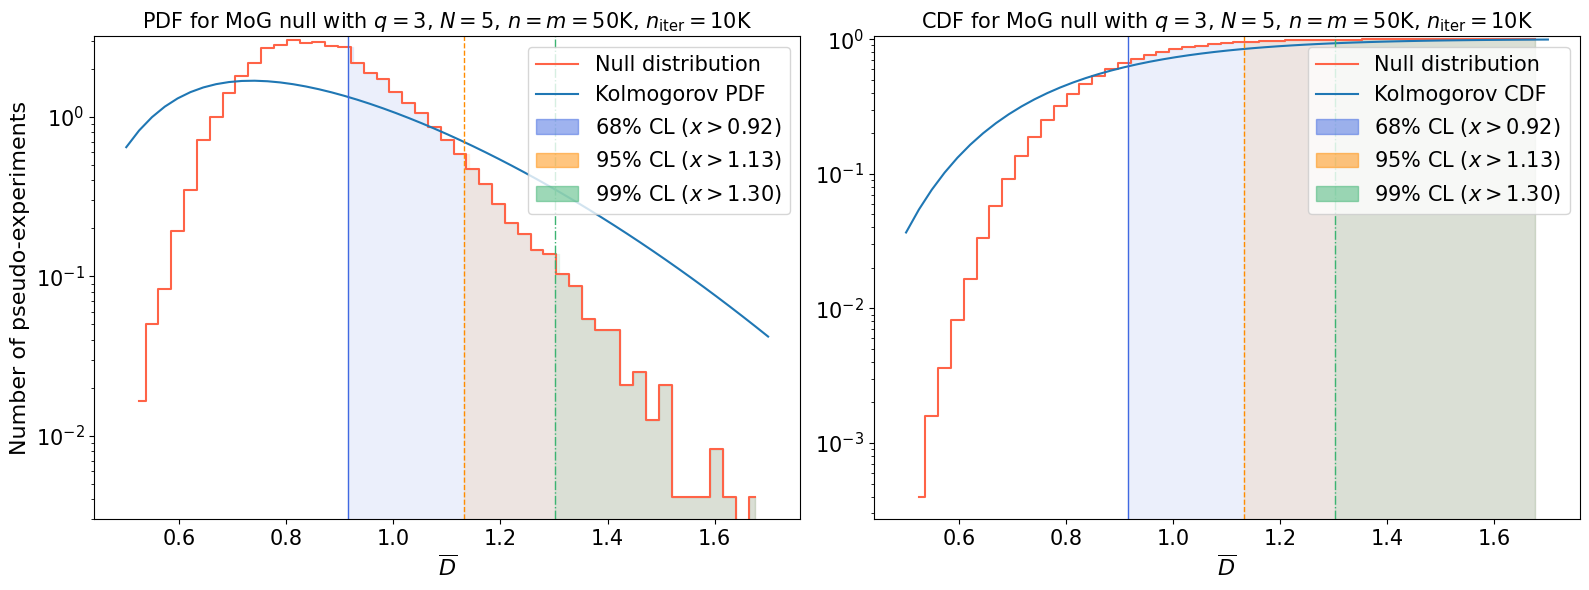

Time elapsed: 1.3334097173064947 seconds.
mu = 0.8681516134119874 +/- 0.00016924598357191862
sigma = 0.13009457466471022 +/- 0.0011652934262257292


/tmp/ipykernel_2598269/1823599339.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2598269/1823599339.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2598269/1823599339.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2598269/1823599339.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


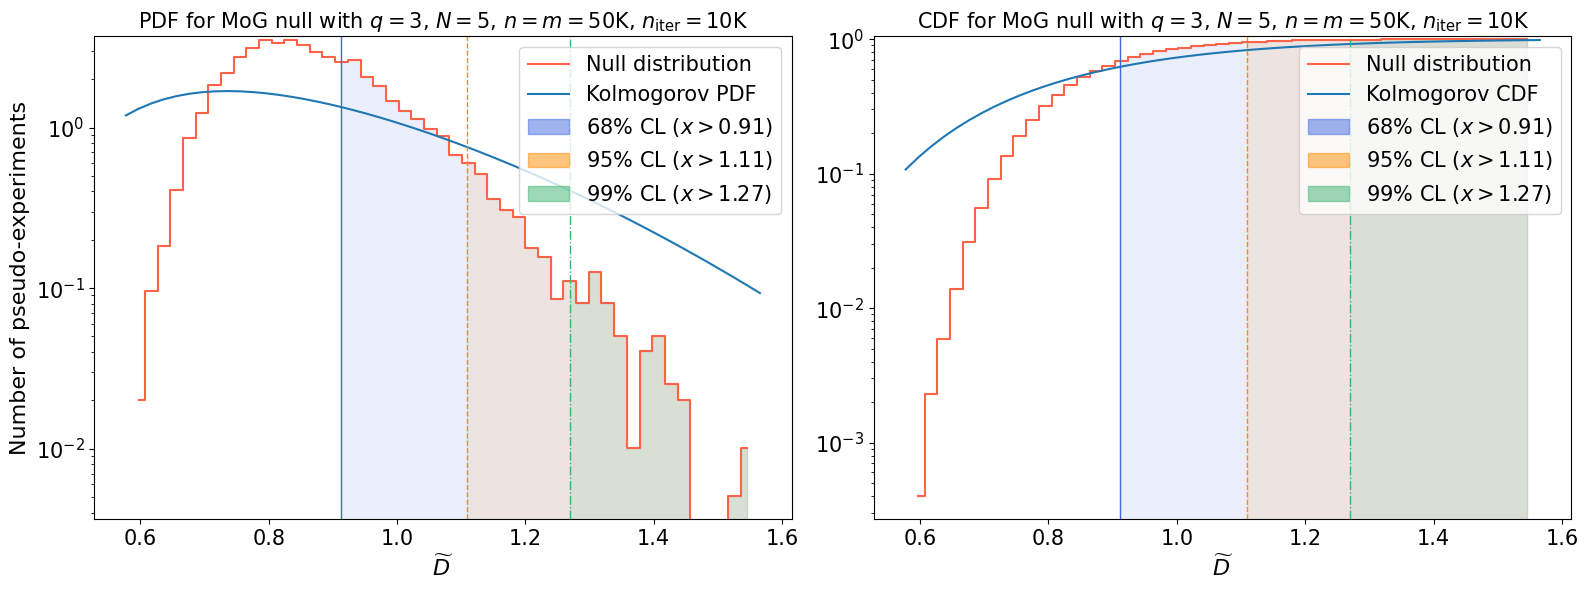

Time elapsed: 3.225208536721766 seconds.
mu = 0.6355531217607878 +/- 0.00033337332233071164
sigma = 0.18258513694458037 +/- 0.0016565666300937987


/tmp/ipykernel_2598269/1823599339.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2598269/1823599339.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2598269/1823599339.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2598269/1823599339.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


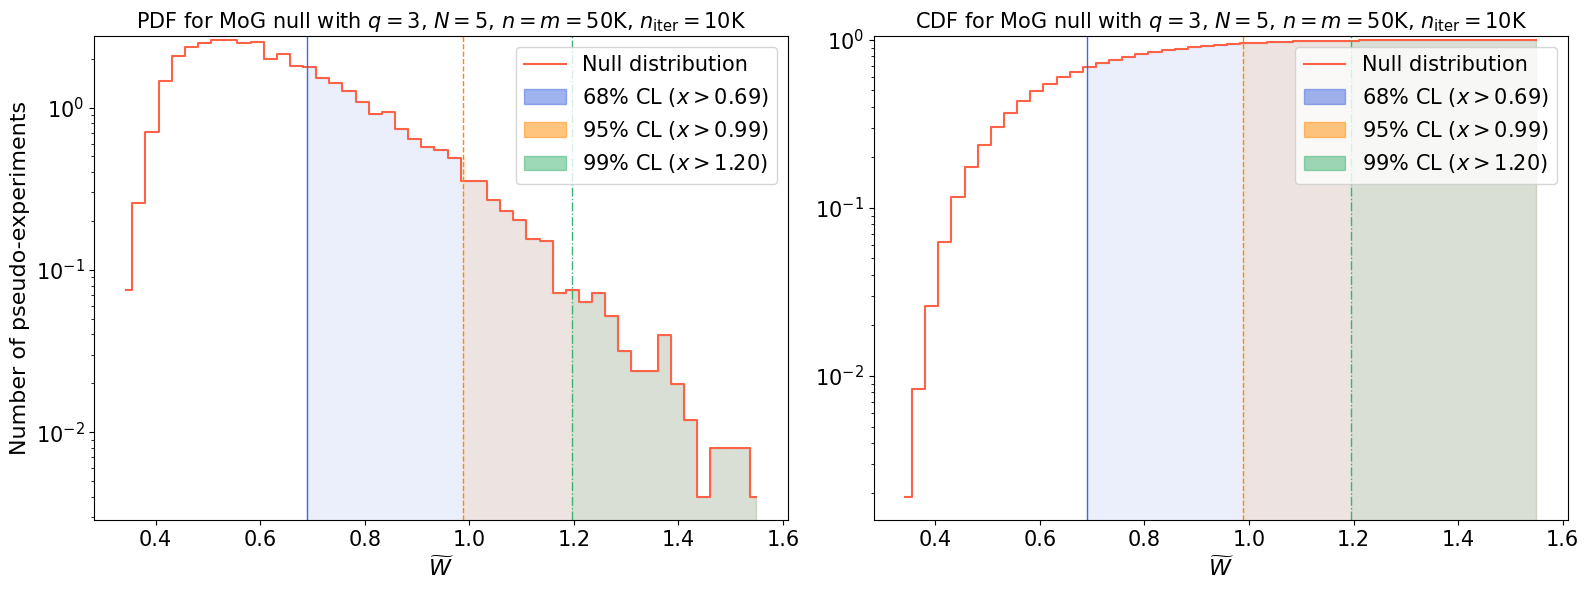

Time elapsed: 0.9458500975742936 seconds.


name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7fa892426ca0>   
1          metric_list  <function <lambda> at 0x7fa892426d40>   
2          metric_list  <function <lambda> at 0x7fa892426de0>   
3      statistic_means  <function <lambda> at 0x7fa892427100>   
4         metric_means  <function <lambda> at 0x7fa8924271a0>   
5         metric_means  <function <lambda> at 0x7fa892427240>   
6  lik_ratio_norm_list  <function <lambda> at 0x7fa8924272e0>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1              lambda ns, ndims: 10000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 50000, 'ba...           1000   
1  {'niter': 10000, 'batch_size_test': 50000, 'ba...            200   
2  {'niter': 10000, 'batch_size_test': 50000, 'ba...              1   
3  {'niter': 10000, 'batch_size_test': 50000, 'ba...           2000   
4  {'niter': 10000, 'batch_size_test': 50000, 'ba...            100   
5  {'niter': 10000, 'batch_size_test': 50000, 'ba...            100   
6  {'niter': 10000, 'batch_size_test': 50000, 'ba...            500   

                        latex  \
0  $\overline{\|\cdot\|}_{F}$   
1          $d_{\mathrm{FPD}}$   
2          $d_{\mathrm{KPD}}$   
3              $\overline{D}$   
4             $\widetilde{D}$   
5             $\widetilde{W}$   
6                   $t_{\mu}$   

                                           null_file  \
0  ../results_leonardo/5D_50K/null_hypothesis/FN....   
1  ../results_leonardo/5D_50K/null_hypothesis/FPD...   
2  ../results_leonardo/5D_50K/null_hypothesis/KPD...   
3  ../results_leonardo/5D_50K/null_hypothesis/KS....   
4  ../results_leonardo/5D_50K/null_hypothesis/SKS...   
5  ../results_leonardo/5D_50K/null_hypothesis/SWD...   
6  ../results_leonardo/5D_50K/null_hypothesis/LR....   

                                          thresholds  \
0  [[0.68, [6800, 3199], 0.7298814389654293], [0....   
1  [[0.68, [6800, 3199], 0.45283092579245954], [0...   
2  [[0.68, [6800, 3199], 0.26125275099655454], [0...   
3  [[0.68, [6800, 3199], 0.9151610229957364], [0....   
4  [[0.68, [6800, 3199], 0.9121602305718006], [0....   
5  [[0.68, [6800, 3199], 0.689925739441241], [0.9...   
6                                                 []   

                                         null_figure  
0  ../results_leonardo/5D_50K/null_hypothesis/FN.pdf  
1  ../results_leonardo/5D_50K/null_hypothesis/FPD...  
2  ../results_leonardo/5D_50K/null_hypothesis/KPD...  
3  ../results_leonardo/5D_50K/null_hypothesis/KS.pdf  
4  ../results_leonardo/5D_50K/null_hypothesis/SKS...  
5  ../results_leonardo/5D_50K/null_hypothesis/SWD...  
6                                                NaN

In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [ ]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [ ]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 5.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Computing exclusion limits for fn with mean deformation.

=============== fn - only mean ===============

------------ 1 ------------
eps = 2.5
statistic = 56.86236920971069 - next threshold = 1.194343275342383 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.917711959618804

------------ 2 ------------
eps = 1.25
statistic = 34.98552488133282 - next threshold = 1.194343275342383 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.8679549333711956

------------ 3 ------------
eps = 0.625
statistic = 20.287542934935047 - next threshold = 1.194343275342383 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.7776092353061657

------------ 4 ------------
eps = 0.3125
statistic = 10.81991722833954 - next threshold = 1.194343275342383 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.6023581226738468

------------ 5 ------------
eps = 0.15625
statistic = 5.529386786084043 - next threshold = 1.194343275342383 at 0.95 CL
relative_error_eps = 2.0
rel

### Likelihood-ratio test

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [ ]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Computing exclusion limits for lr with mean deformation.

=============== lr - only mean ===============

------------ 1 ------------
eps = 0.005
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 20
Iterating from 0 to 500 out of 10000 .
Iterating from 500 to 1000 out of 10000 .
Iterating from 1000 to 1500 out of 10000 .
Iterating from 1500 to 2000 out of 10000 .
Iterating from 2000 to 2500 out of 10000 .
Iterating from 2500 to 3000 out of 10000 .
Iterating from 3000 to 3500 out of 10000 .
Iterating from 3500 to 4

### Show and save results

In [ ]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


In [ ]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [ ]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
18        lr        mean    5  10000                50000   
9         ks        mean    5  10000                50000   
12       sks        mean    5  10000                50000   
15       swd        mean    5  10000                50000   
3        fpd        mean    5  10000                50000   
0         fn        mean    5  10000                50000   
6        kpd        mean    5  10000                50000   

    $\epsilon^{\mu}_{95\%\mathrm{CL}}$  $\epsilon^{\mu}_{99\%\mathrm{CL}}$  \
18                             0.00037                             0.00057   
9                              0.00399                             0.00568   
12                             0.01286                             0.01719   
15                             0.02174                             0.02972   
3                              0.03250                             0.04357   
0                              0.03342                             0.04327   
6                              0.23743                             0.25080   

    $t^{\mu}$ (s)  
18           1316  
9             478  
12            546  
15            415  
3             390  
0             324  
6             742

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
18        lr                             0.00037   
9         ks                             0.00399   
12       sks                             0.01286   
15       swd                             0.02174   
3        fpd                             0.03250   
0         fn                             0.03342   
6        kpd                             0.23743   

    $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  
18                             0.00057           1316  
9                              0.00568            478  
12                             0.01719            546  
15                             0.02972            415  
3                              0.04357            390  
0                              0.04327            324  
6                              0.25080            742

In [ ]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
19        lr         std    5  10000                50000   
10        ks         std    5  10000                50000   
13       sks         std    5  10000                50000   
16       swd         std    5  10000                50000   
4        fpd         std    5  10000                50000   
1         fn         std    5  10000                50000   
7        kpd         std    5  10000                50000   

    $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19                                0.00088   
10                                0.01324   
13                                0.03189   
16                                0.04654   
4                                 0.06378   
1                                 0.06805   
7                                 3.07373   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00121              1212  
10                                0.01727               447  
13                                0.04235               504  
16                                0.06317               377  
4                                 0.08638               368  
1                                 0.09786               295  
7                                 3.13769               565

Statistic  $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19        lr                                0.00088   
10        ks                                0.01324   
13       sks                                0.03189   
16       swd                                0.04654   
4        fpd                                0.06378   
1         fn                                0.06805   
7        kpd                                3.07373   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00121              1212  
10                                0.01727               447  
13                                0.04235               504  
16                                0.06317               377  
4                                 0.08638               368  
1                                 0.09786               295  
7                                 3.13769               565

In [ ]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
20        lr        both    5  10000                50000   
11        ks        both    5  10000                50000   
14       sks        both    5  10000                50000   
17       swd        both    5  10000                50000   
5        fpd        both    5  10000                50000   
2         fn        both    5  10000                50000   
8        kpd        both    5  10000                50000   

    $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20                                    0.00035   
11                                    0.00371   
14                                    0.01171   
17                                    0.01961   
5                                     0.03014   
2                                     0.03044   
8                                     0.23956   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00052                  1281  
11                                    0.00522                   519  
14                                    0.01559                   569  
17                                    0.02668                   419  
5                                     0.04030                   418  
2                                     0.03939                   329  
8                                     0.25177                   784

Statistic  $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20        lr                                    0.00035   
11        ks                                    0.00371   
14       sks                                    0.01171   
17       swd                                    0.01961   
5        fpd                                    0.03014   
2         fn                                    0.03044   
8        kpd                                    0.23956   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00052                  1281  
11                                    0.00522                   519  
14                                    0.01559                   569  
17                                    0.02668                   419  
5                                     0.04030                   418  
2                                     0.03939                   329  
8                                     0.25177                   784

In [ ]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
0  $\overline{\|\cdot\|}_{F}$                             0.03342   
1          $d_{\mathrm{FPD}}$                             0.03250   
2          $d_{\mathrm{KPD}}$                             0.23743   
3              $\overline{D}$                             0.00399   
4          $t_{\mathrm{LLR}}$                             0.00037   
5             $\widetilde{D}$                             0.01286   
6             $\widetilde{W}$                             0.02174   

   $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  \
0                             0.04327            324   
1                             0.04357            390   
2                             0.25080            742   
3                             0.00568            478   
4                             0.00057           1316   
5                             0.01719            546   
6                             0.02972            415   

   $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
0                                0.06805   
1                                0.06378   
2                                3.07373   
3                                0.01324   
4                                0.00088   
5                                0.03189   
6                                0.04654   

   $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  \
0                                0.09786               295   
1                                0.08638               368   
2                                3.13769               565   
3                                0.01727               447   
4                                0.00121              1212   
5                                0.04235               504   
6                                0.06317               377   

   $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
0                                    0.03044   
1                                    0.03014   
2                                    0.23956   
3                                    0.00371   
4                                    0.00035   
5                                    0.01171   
6                                    0.01961   

   $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  \
0                                    0.03939                   329   
1                                    0.04030                   418   
2                                    0.25177                   784   
3                                    0.00522                   519   
4                                    0.00052                  1281   
5                                    0.01559                   569   
6                                    0.02668                   419   

  $t^{\mathrm{null}}$ (s)  
0                      23  
1                     175  
2                   21290  
3                      65  
4                       -  
5                     538  
6                     316

\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$\overline{\|\cdot\|}_{F}$ & 0.033 & 0.043 & 324 & 0.068 & 0.098 & 295 & 0.03 & 0.039 & 329 & 23 \\
$d_{\mathrm{FPD}}$ & 0.033 & 0.044 & 390 & 0.064 & 0.086 & 368 & 0.03 & 0.04 & 418 & 175 \\
$d_{\mathrm{KPD}}$ & 0.24 & 0.25 & 742 & 3.1 & 3.1 & 565 & 0.24 & 0.25 & 784 & 21290 \\
$\overline{D}$ & 0.004 & 0.0057 & 478 & 0.013 & 0.017 & 447 & 0.0037 & 0.0052 & 519 & 65 \\
$t_{\mathrm{LLR}}$ & 0.00037 & 0.00057 & 1316 & 0.00088 & 0.0012 & 1212 & 0.00035 & 0.00052 & 1281 & - \\
$\widetilde{D}$ & 0.013 & 0.017 & 546 & 0.032 & 0.042 & 504 & 0.012 & 0.016 & 569 & 538 \\
$\widetilde{W}$ & 0.022 & 0.03 & 415 & 0.

# Fixed $n=100000$

## Null hypotheses

### Model definition

In [ ]:
batch_size_test = 100_000

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)


In [ ]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [ ]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 1000000000
batch_size 100000
niter 10000
niter * batch_size 1000000000
small_sample False


In [ ]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 5_000,
                               num_batches = 1,
                               batch_size = 100_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [ ]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

niter  batch_size_test  batch_size_gen  small_sample_threshold dtype_input  \
0  10000           100000           10000                10000000     float64   

   seed  use_tf  mirror_strategy strategy  verbose  ...  ndims_1  nsamples_1  \
0     0    True            False     None     True  ...        5           0   

   is_symb_2  ndims_2  nsamples_2    dtype ndims    nsamples  small_sample  \
0       True        5           0  float64     5  1000000000         False   

   ncomp  
0      3  

[1 rows x 21 columns]

In [ ]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                      "object_name": "FNMetric",
                                      "class_name": "GMetrics.FNMetric",
                                      "kwargs": {},
                                      "result_key": "metric_list", 
                                      "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                      "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                      "test_config": test_config_null,
                                      "max_vectorize": 500, # optimized for 5D
                                      "latex": "$\overline{\|\cdot\|}_{F}$",
                                      "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100, # optimized for 5D
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1, # optimized for 5D
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 100000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 5,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 5,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 5,
   'nsamples': 1000000000,
   'small_sample': False,
   'ncomp': 3},
  'max_vectorize': 500,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results_leonardo/5D_100K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_

### Evaluate null hypotheses

In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from ../results_leonardo/5D_100K/null_hypothesis/FN.json
Loading fpd from ../results_leonardo/5D_100K/null_hypothesis/FPD.json
Computing and savng kpd with max_vectorize = 1

------------------------------------------
Starting KPD metric calculation...
Running TF KPD calculation...
niter = 10000
batch_size = 100000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 10000
Iterating from 0 to 1 out of 10000 .


I0000 00:00:1712847697.641243  370086 service.cc:145] XLA service 0xb8de6970 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712847697.641286  370086 service.cc:153]   StreamExecutor device (0): NVIDIA A100-SXM-64GB, Compute Capability 8.0
W0000 00:00:1712847697.701114  370086 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_1/Assert/Assert
W0000 00:00:1712847697.704893  370086 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_3/Assert/Assert
W0000 00:00:1712847697.705807  370086 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_5/Assert/Assert
W0000 00:00:1712847697.706116  370086 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_7/Assert/Assert
W0000 00:00:1712847697.707024  370086 assert_op.cc:38] Ignoring Assert operator while/M

Computing (Tensor("while/Placeholder:0", shape=(), dtype=int32),Tensor("while/while/Placeholder:0", shape=(), dtype=int32)) component
Iterating from 1 to 2 out of 10000 .
Iterating from 2 to 3 out of 10000 .
Iterating from 3 to 4 out of 10000 .
Iterating from 4 to 5 out of 10000 .
Iterating from 5 to 6 out of 10000 .
Iterating from 6 to 7 out of 10000 .
Iterating from 7 to 8 out of 10000 .
Iterating from 8 to 9 out of 10000 .
Iterating from 9 to 10 out of 10000 .
Iterating from 10 to 11 out of 10000 .
Iterating from 11 to 12 out of 10000 .
Iterating from 12 to 13 out of 10000 .
Iterating from 13 to 14 out of 10000 .
Iterating from 14 to 15 out of 10000 .
Iterating from 15 to 16 out of 10000 .
Iterating from 16 to 17 out of 10000 .
Iterating from 17 to 18 out of 10000 .
Iterating from 18 to 19 out of 10000 .
Iterating from 19 to 20 out of 10000 .
Iterating from 20 to 21 out of 10000 .
Iterating from 21 to 22 out of 10000 .
Iterating from 22 to 23 out of 10000 .
Iterating from 23 to 24 o

In [ ]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.7311931613101769], [0.95, [9500, 500], 1.2152135086781035], [0.99, [9900, 100], 1.5590543375150292]]
Computing time for metric fn: 33.18956989585422
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.3721655670741698], [0.95, [9500, 500], 0.4101249406132395], [0.99, [9900, 100], 0.4512487853491462]]
Computing time for metric fpd: 270.10692294710316
ThresholdS for metric kpd: [[0.68, [6800, 3199], -0.07877539754373998], [0.95, [9500, 500], -0.011921334883213675], [0.99, [9900, 100], 0.028590647968884664]]
Computing time for metric kpd: 30466.033751571085
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9199168115783043], [0.95, [9500, 500], 1.1323405345344149], [0.99, [9900, 100], 1.284396397308672]]
Computing time for metric ks: 102.95067132893018
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9117351041017392], [0.95, [9500, 500], 1.1124223535563071], [0.99, [9900, 100], 1.265660243663076]]
Computing time for metric sks: 786.86756

name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f87e7259800>   
1          metric_list  <function <lambda> at 0x7f87e72598a0>   
2          metric_list  <function <lambda> at 0x7f87e725aca0>   
3      statistic_means  <function <lambda> at 0x7f87e725afc0>   
4         metric_means  <function <lambda> at 0x7f87e725b060>   
5         metric_means  <function <lambda> at 0x7f87e725b100>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f87e725b1a0>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1              lambda ns, ndims: 10000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 100000, 'b...            500   
1  {'niter': 10000, 'batch_size_test': 100000, 'b...            100   
2  {'niter': 10000, 'batch_size_test': 100000, 'b...              1   
3  {'niter': 10000, 'batch_size_test': 100000, 'b...           1000   
4  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   
5  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   
6  {'niter': 10000, 'batch_size_test': 100000, 'b...            200   

                        latex  \
0  $\overline{\|\cdot\|}_{F}$   
1          $d_{\mathrm{FPD}}$   
2          $d_{\mathrm{KPD}}$   
3              $\overline{D}$   
4             $\widetilde{D}$   
5             $\widetilde{W}$   
6                   $t_{\mu}$   

                                           null_file  \
0  ../results_leonardo/5D_100K/null_hypothesis/FN...   
1  ../results_leonardo/5D_100K/null_hypothesis/FP...   
2  ../results_leonardo/5D_100K/null_hypothesis/KP...   
3  ../results_leonardo/5D_100K/null_hypothesis/KS...   
4  ../results_leonardo/5D_100K/null_hypothesis/SK...   
5  ../results_leonardo/5D_100K/null_hypothesis/SW...   
6  ../results_leonardo/5D_100K/null_hypothesis/LR...   

                                          thresholds  
0  [[0.68, [6800, 3199], 0.7311931613101769], [0....  
1  [[0.68, [6800, 3199], 0.3721655670741698], [0....  
2  [[0.68, [6800, 3199], -0.07877539754373998], [...  
3  [[0.68, [6800, 3199], 0.9199168115783043], [0....  
4  [[0.68, [6800, 3199], 0.9117351041017392], [0....  
5  [[0.68, [6800, 3199], 0.6889382599299374], [0....  
6                                                 []

### Plots of null-distributions

mu = 0.6516939997710277 +/- 0.0008453544464860177
sigma = 0.2907497973320046 +/- 0.0027147626221840793


/tmp/ipykernel_370086/1823599339.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_370086/1823599339.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_370086/1823599339.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_370086/1823599339.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


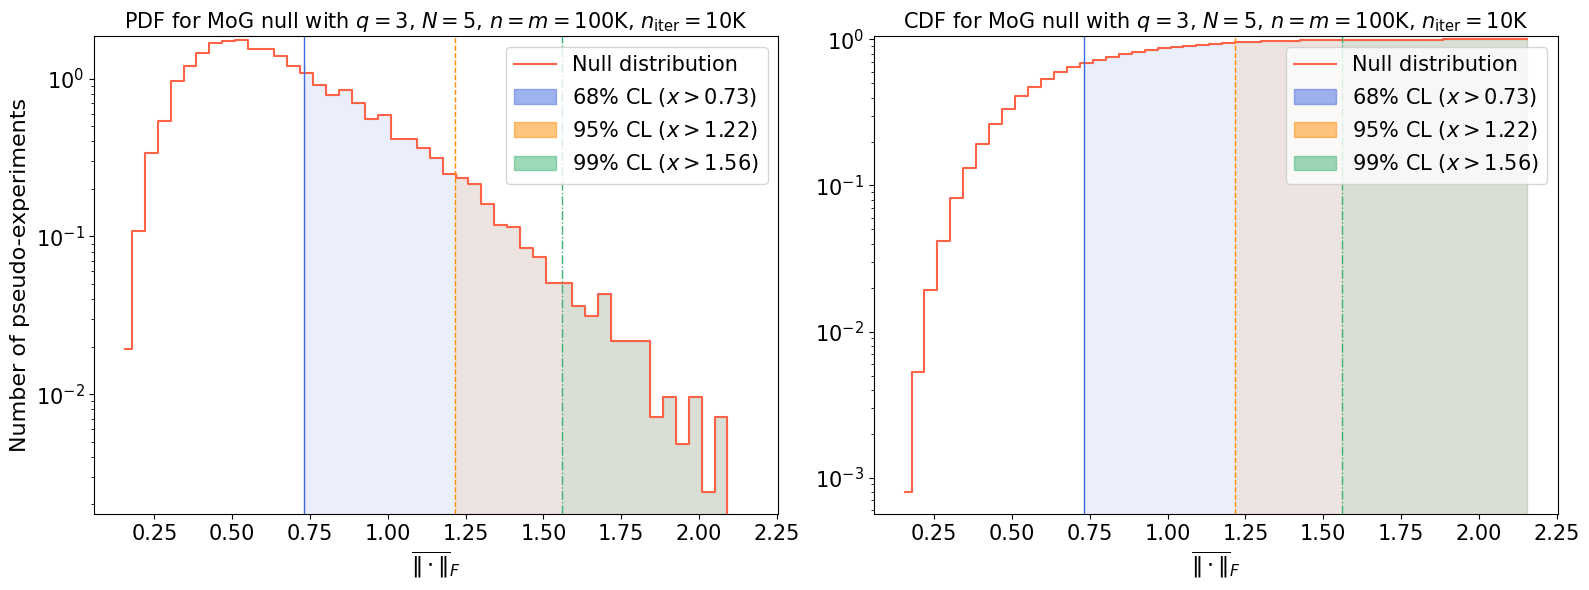

Time elapsed: 1.5198449280578643 seconds.
mu = 0.37037236579175314 +/- 4.298580003632062e-06
sigma = 0.020733017155329953 +/- 0.000367371551416249


/tmp/ipykernel_370086/1823599339.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_370086/1823599339.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_370086/1823599339.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_370086/1823599339.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


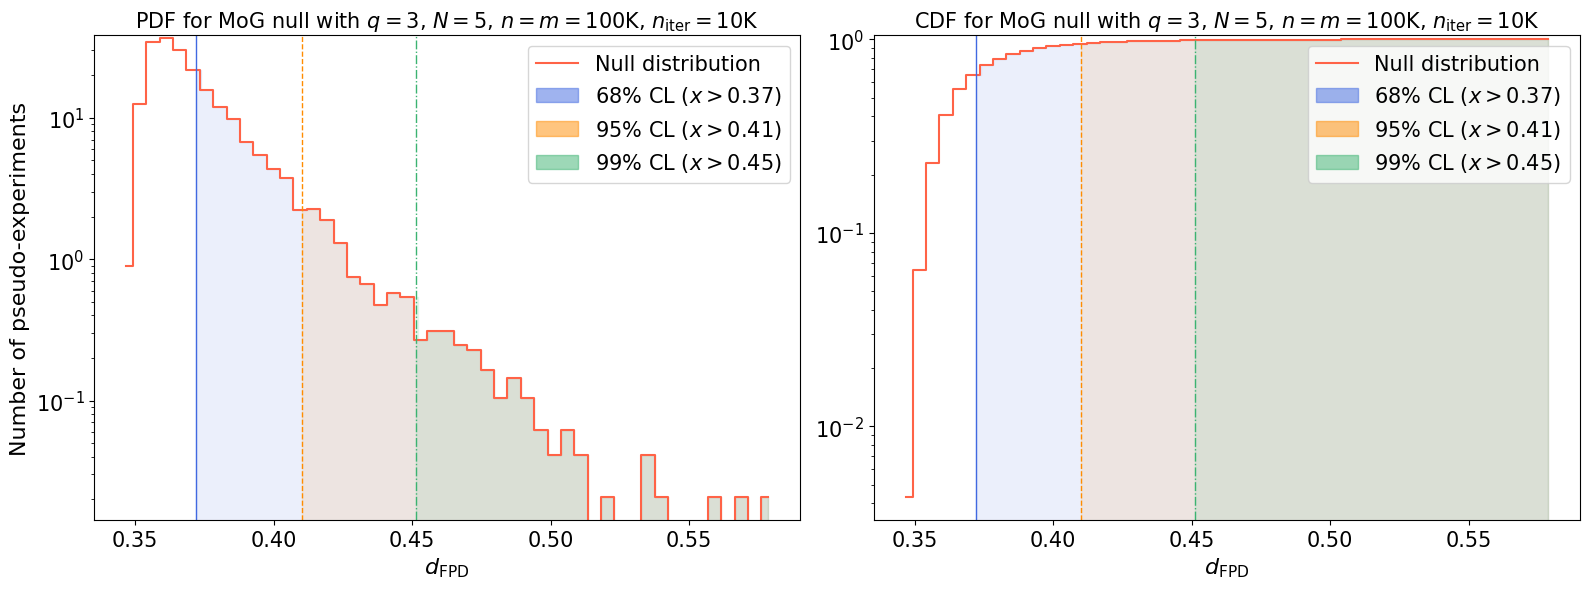

Time elapsed: 0.9528770609758794 seconds.
mu = -0.10200337186971595 +/- 2.866492800349496e-05
sigma = 0.05353963765612815 +/- 0.0003878556341894495


/tmp/ipykernel_370086/1823599339.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_370086/1823599339.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_370086/1823599339.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_370086/1823599339.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


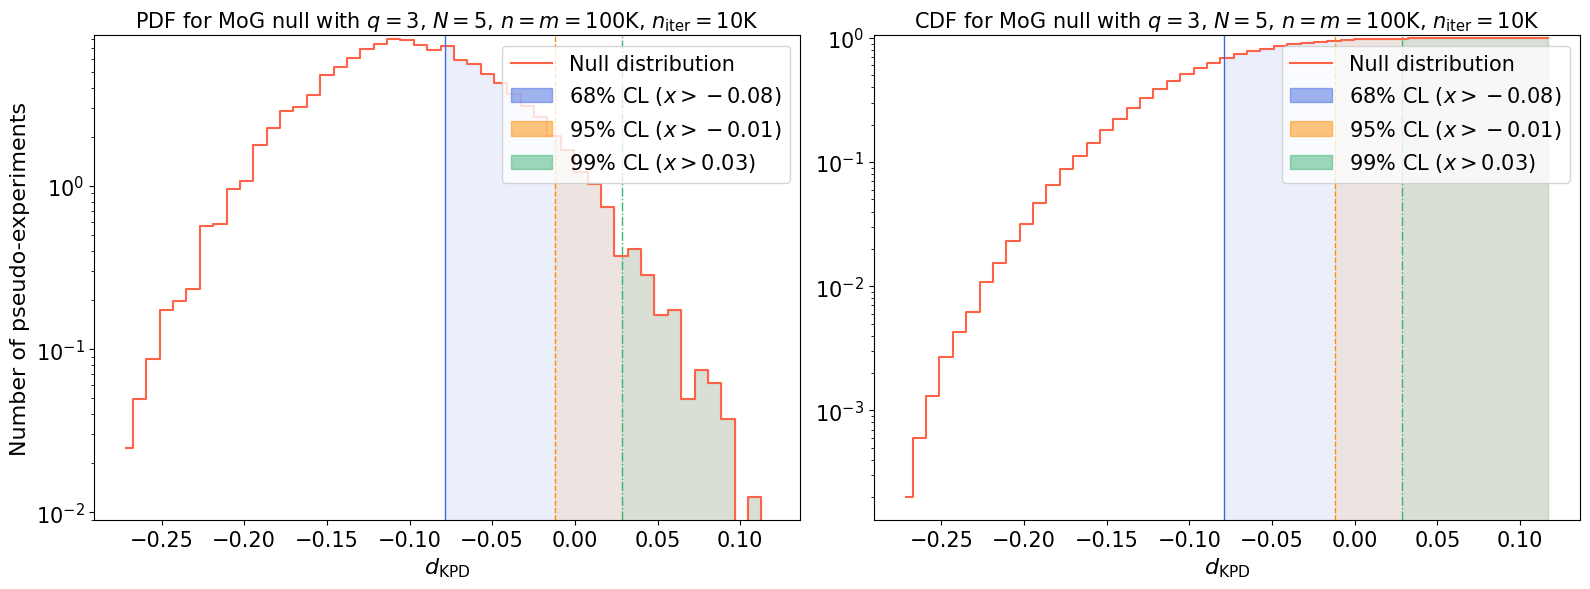

Time elapsed: 1.0227291870396584 seconds.
mu = 0.8693149240841894 +/- 0.00020805869243534366
sigma = 0.14424239752421744 +/- 0.0012550704659856392


/tmp/ipykernel_370086/1823599339.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_370086/1823599339.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_370086/1823599339.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_370086/1823599339.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


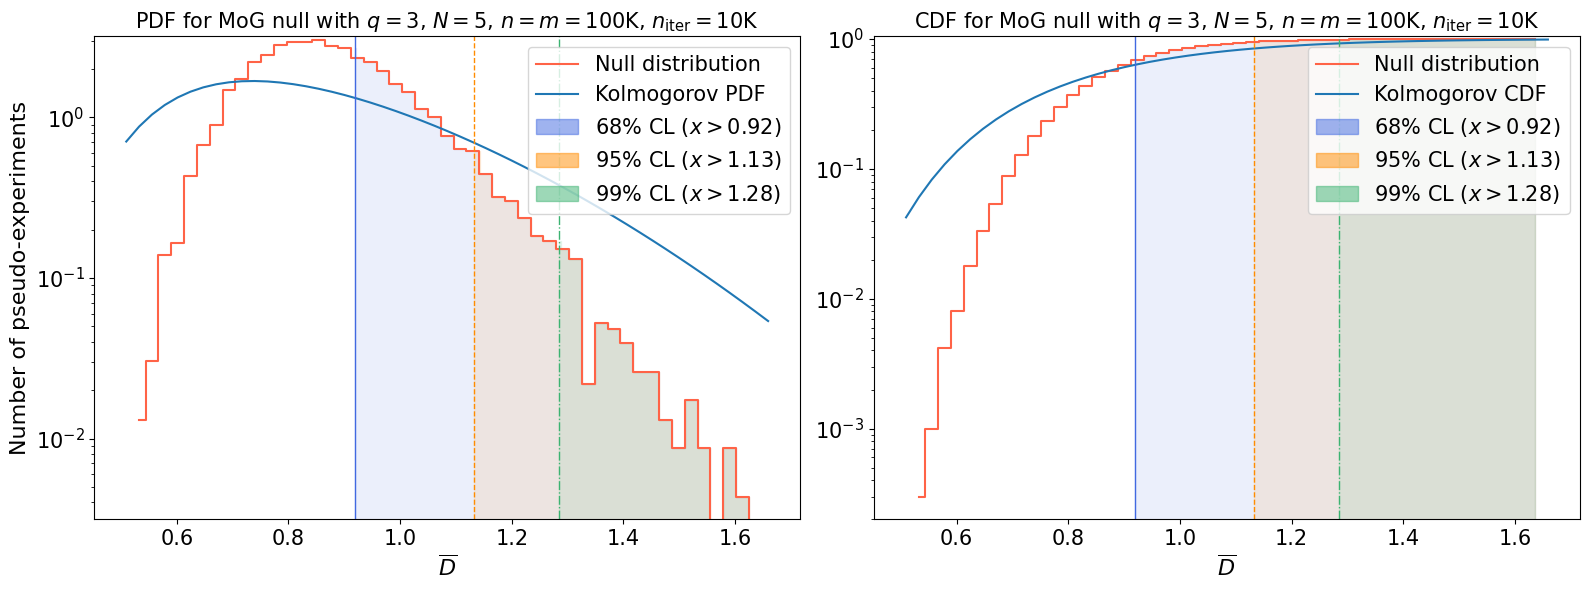

Time elapsed: 1.35298205120489 seconds.
mu = 0.8689293527700909 +/- 0.00017416942795426158
sigma = 0.1319732654571605 +/- 0.001199891859395542


/tmp/ipykernel_370086/1823599339.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_370086/1823599339.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_370086/1823599339.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_370086/1823599339.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


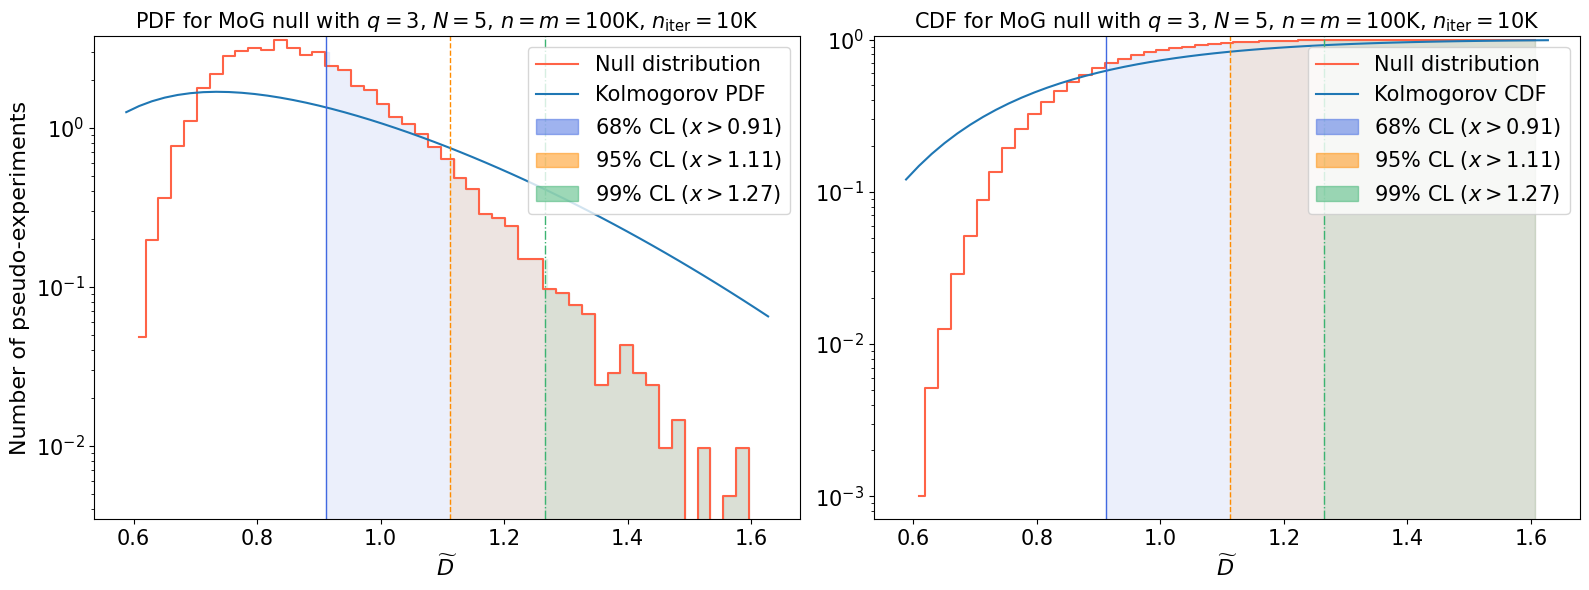

Time elapsed: 1.3584744611289352 seconds.
mu = 0.6350235360487639 +/- 0.00034087011831206317
sigma = 0.18462668233818838 +/- 0.0017387793214599034


/tmp/ipykernel_370086/1823599339.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_370086/1823599339.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_370086/1823599339.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_370086/1823599339.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


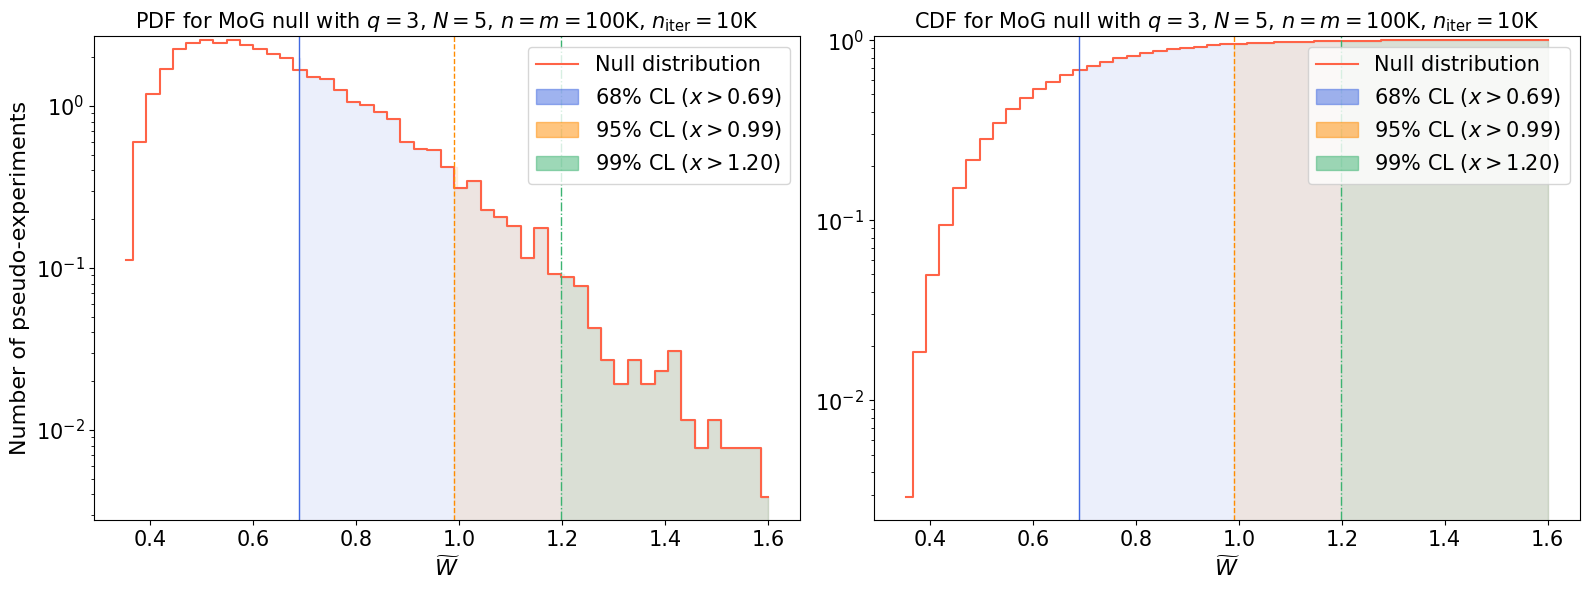

Time elapsed: 4.226057433988899 seconds.


name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f87e7259800>   
1          metric_list  <function <lambda> at 0x7f87e72598a0>   
2          metric_list  <function <lambda> at 0x7f87e725aca0>   
3      statistic_means  <function <lambda> at 0x7f87e725afc0>   
4         metric_means  <function <lambda> at 0x7f87e725b060>   
5         metric_means  <function <lambda> at 0x7f87e725b100>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f87e725b1a0>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1              lambda ns, ndims: 10000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 100000, 'b...            500   
1  {'niter': 10000, 'batch_size_test': 100000, 'b...            100   
2  {'niter': 10000, 'batch_size_test': 100000, 'b...              1   
3  {'niter': 10000, 'batch_size_test': 100000, 'b...           1000   
4  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   
5  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   
6  {'niter': 10000, 'batch_size_test': 100000, 'b...            200   

                        latex  \
0  $\overline{\|\cdot\|}_{F}$   
1          $d_{\mathrm{FPD}}$   
2          $d_{\mathrm{KPD}}$   
3              $\overline{D}$   
4             $\widetilde{D}$   
5             $\widetilde{W}$   
6                   $t_{\mu}$   

                                           null_file  \
0  ../results_leonardo/5D_100K/null_hypothesis/FN...   
1  ../results_leonardo/5D_100K/null_hypothesis/FP...   
2  ../results_leonardo/5D_100K/null_hypothesis/KP...   
3  ../results_leonardo/5D_100K/null_hypothesis/KS...   
4  ../results_leonardo/5D_100K/null_hypothesis/SK...   
5  ../results_leonardo/5D_100K/null_hypothesis/SW...   
6  ../results_leonardo/5D_100K/null_hypothesis/LR...   

                                          thresholds  \
0  [[0.68, [6800, 3199], 0.7311931613101769], [0....   
1  [[0.68, [6800, 3199], 0.3721655670741698], [0....   
2  [[0.68, [6800, 3199], -0.07877539754373998], [...   
3  [[0.68, [6800, 3199], 0.9199168115783043], [0....   
4  [[0.68, [6800, 3199], 0.9117351041017392], [0....   
5  [[0.68, [6800, 3199], 0.6889382599299374], [0....   
6                                                 []   

                                         null_figure  
0  ../results_leonardo/5D_100K/null_hypothesis/FN...  
1  ../results_leonardo/5D_100K/null_hypothesis/FP...  
2  ../results_leonardo/5D_100K/null_hypothesis/KP...  
3  ../results_leonardo/5D_100K/null_hypothesis/KS...  
4  ../results_leonardo/5D_100K/null_hypothesis/SK...  
5  ../results_leonardo/5D_100K/null_hypothesis/SW...  
6                                                NaN

In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [ ]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [ ]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 5.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Computing exclusion limits for fn with mean deformation.

=============== fn - only mean ===============

------------ 1 ------------
eps = 2.5
statistic = 80.70564401110042 - next threshold = 1.2152135086781035 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.94066402401197

------------ 2 ------------
eps = 1.25
statistic = 49.56604599226681 - next threshold = 1.2152135086781035 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9042785846100967

------------ 3 ------------
eps = 0.625
statistic = 28.617883664147243 - next threshold = 1.2152135086781035 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.8370650554130157

------------ 4 ------------
eps = 0.3125
statistic = 15.14663933683161 - next threshold = 1.2152135086781035 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.7029154289181616

------------ 5 ------------
eps = 0.15625
statistic = 7.623744797718514 - next threshold = 1.2152135086781035 at 0.95 CL
relative_error_eps = 2.0

### Likelihood-ratio test

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [ ]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Computing exclusion limits for lr with mean deformation.

=============== lr - only mean ===============

------------ 1 ------------
eps = 0.005
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 50
Iterating from 0 to 200 out of 10000 .
Iterating from 200 to 400 out of 10000 .
Iterating from 400 to 600 out of 10000 .
Iterating from 600 to 800 out of 10000 .
Iterating from 800 to 1000 out of 10000 .
Iterating from 1000 to 1200 out of 10000 .
Iterating from 1200 to 1400 out of 10000 .
Iterating from 1400 to 1600 o

### Show and save results

In [ ]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


In [ ]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [ ]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
18        lr        mean    5  10000               100000   
9         ks        mean    5  10000               100000   
12       sks        mean    5  10000               100000   
15       swd        mean    5  10000               100000   
3        fpd        mean    5  10000               100000   
0         fn        mean    5  10000               100000   
6        kpd        mean    5  10000               100000   

    $\epsilon^{\mu}_{95\%\mathrm{CL}}$  $\epsilon^{\mu}_{99\%\mathrm{CL}}$  \
18                             0.00021                             0.00034   
9                              0.00274                             0.00372   
12                             0.00654                             0.00955   
15                             0.01232                             0.01757   
3                              0.01900                             0.02789   
0                              0.02815                             0.03589   
6                              0.25757                             0.26712   

    $t^{\mu}$ (s)  
18           1680  
9             510  
12            590  
15            425  
3             425  
0             348  
6             730

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
18        lr                             0.00021   
9         ks                             0.00274   
12       sks                             0.00654   
15       swd                             0.01232   
3        fpd                             0.01900   
0         fn                             0.02815   
6        kpd                             0.25757   

    $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  
18                             0.00034           1680  
9                              0.00372            510  
12                             0.00955            590  
15                             0.01757            425  
3                              0.02789            425  
0                              0.03589            348  
6                              0.26712            730

In [ ]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
19        lr         std    5  10000               100000   
10        ks         std    5  10000               100000   
13       sks         std    5  10000               100000   
16       swd         std    5  10000               100000   
4        fpd         std    5  10000               100000   
1         fn         std    5  10000               100000   
7        kpd         std    5  10000               100000   

    $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19                                0.00041   
10                                0.00889   
13                                0.01915   
16                                0.03220   
4                                 0.04349   
1                                 0.05173   
7                                 3.40820   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00065              1553  
10                                0.01152               460  
13                                0.02652               550  
16                                0.04357               395  
4                                 0.06134               389  
1                                 0.07377               313  
7                                 3.45600               587

Statistic  $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19        lr                                0.00041   
10        ks                                0.00889   
13       sks                                0.01915   
16       swd                                0.03220   
4        fpd                                0.04349   
1         fn                                0.05173   
7        kpd                                3.40820   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00065              1553  
10                                0.01152               460  
13                                0.02652               550  
16                                0.04357               395  
4                                 0.06134               389  
1                                 0.07377               313  
7                                 3.45600               587

In [ ]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
20        lr        both    5  10000               100000   
11        ks        both    5  10000               100000   
14       sks        both    5  10000               100000   
17       swd        both    5  10000               100000   
5        fpd        both    5  10000               100000   
2         fn        both    5  10000               100000   
8        kpd        both    5  10000               100000   

    $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20                                    0.00016   
11                                    0.00251   
14                                    0.00593   
17                                    0.01141   
5                                     0.01793   
2                                     0.02647   
8                                     0.26001   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00026                  1703  
11                                    0.00339                   530  
14                                    0.00856                   611  
17                                    0.01620                   429  
5                                     0.02606                   437  
2                                     0.03330                   332  
8                                     0.27021                   794

Statistic  $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20        lr                                    0.00016   
11        ks                                    0.00251   
14       sks                                    0.00593   
17       swd                                    0.01141   
5        fpd                                    0.01793   
2         fn                                    0.02647   
8        kpd                                    0.26001   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00026                  1703  
11                                    0.00339                   530  
14                                    0.00856                   611  
17                                    0.01620                   429  
5                                     0.02606                   437  
2                                     0.03330                   332  
8                                     0.27021                   794

In [ ]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
0  $\overline{\|\cdot\|}_{F}$                             0.02815   
1          $d_{\mathrm{FPD}}$                             0.01900   
2          $d_{\mathrm{KPD}}$                             0.25757   
3              $\overline{D}$                             0.00274   
4          $t_{\mathrm{LLR}}$                             0.00021   
5             $\widetilde{D}$                             0.00654   
6             $\widetilde{W}$                             0.01232   

   $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  \
0                             0.03589            348   
1                             0.02789            425   
2                             0.26712            730   
3                             0.00372            510   
4                             0.00034           1680   
5                             0.00955            590   
6                             0.01757            425   

   $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
0                                0.05173   
1                                0.04349   
2                                3.40820   
3                                0.00889   
4                                0.00041   
5                                0.01915   
6                                0.03220   

   $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  \
0                                0.07377               313   
1                                0.06134               389   
2                                3.45600               587   
3                                0.01152               460   
4                                0.00065              1553   
5                                0.02652               550   
6                                0.04357               395   

   $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
0                                    0.02647   
1                                    0.01793   
2                                    0.26001   
3                                    0.00251   
4                                    0.00016   
5                                    0.00593   
6                                    0.01141   

   $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  \
0                                    0.03330                   332   
1                                    0.02606                   437   
2                                    0.27021                   794   
3                                    0.00339                   530   
4                                    0.00026                  1703   
5                                    0.00856                   611   
6                                    0.01620                   429   

  $t^{\mathrm{null}}$ (s)  
0                      33  
1                     270  
2                   30466  
3                     102  
4                       -  
5                     786  
6                     353

\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$\overline{\|\cdot\|}_{F}$ & 0.028 & 0.036 & 348 & 0.052 & 0.074 & 313 & 0.026 & 0.033 & 332 & 33 \\
$d_{\mathrm{FPD}}$ & 0.019 & 0.028 & 425 & 0.043 & 0.061 & 389 & 0.018 & 0.026 & 437 & 270 \\
$d_{\mathrm{KPD}}$ & 0.26 & 0.27 & 730 & 3.4 & 3.5 & 587 & 0.26 & 0.27 & 794 & 30466 \\
$\overline{D}$ & 0.0027 & 0.0037 & 510 & 0.0089 & 0.012 & 460 & 0.0025 & 0.0034 & 530 & 102 \\
$t_{\mathrm{LLR}}$ & 0.00021 & 0.00034 & 1680 & 0.00041 & 0.00065 & 1553 & 0.00016 & 0.00026 & 1703 & - \\
$\widetilde{D}$ & 0.0065 & 0.0095 & 590 & 0.019 & 0.027 & 550 & 0.0059 & 0.0086 & 611 & 786 \\
$\widetilde{W}$ & 0.012 & 0.01

# Fixed $\epsilon$

In [20]:
fpd_results = {5: {10_000: [[0.68, 0.00010175550386551708], 
                            [0.95, 0.00015583746551772079], 
                            [0.99, 0.00022347410983350775]],
                   50_000: [[0.68, 4.5226688115357585e-05], 
                            [0.95, 5.398123973119404e-05], 
                            [0.99, 6.354077850007809e-05]],
                   100_000 : [[0.68, 3.725127064668703e-05], 
                              [0.95, 4.0825583153507725e-05], 
                              [0.99, 4.465564257168013e-05]],
                   200_000 : [[0.68, 3.3691504288769034e-05], 
                              [0.95, 3.5351867696872585e-05], 
                              [0.99, 3.68684570537516e-05]]},
               20: {10_000: [[0.68, 0.0006669445748113884], 
                             [0.95, 0.0013217846893085318], 
                             [0.99, 0.0019605548728214763]],
                    50_000: [[0.68, 0.00031117601754665936], 
                             [0.95, 0.00040269921440860503], 
                             [0.99, 0.000502723348035641]],
                    100_000 : [[0.68, 0.00015735387007512796], 
                               [0.95, 0.0001991294338873111], 
                               [0.99, 0.00028358152805583374]]},
               100: {10_000: [[0.68, 0.0060367495598200515], 
                              [0.95, 0.009021833572706342], 
                              [0.99, 0.011125954730711617]],
                     50_000: [[0.68, 0.0012229712948642107], 
                              [0.95, 0.001787009273603958], 
                              [0.99, 0.0022351123346437667]],
                    100_000 : [[0.68, 0.000817842570244682], 
                               [0.95, 0.0011978135448655475], 
                               [0.99, 0.001414743609381014]]}}
fpd_results

{5: {10000: [[0.68, 0.00010175550386551708],
   [0.95, 0.00015583746551772079],
   [0.99, 0.00022347410983350775]],
  50000: [[0.68, 4.5226688115357585e-05],
   [0.95, 5.398123973119404e-05],
   [0.99, 6.354077850007809e-05]],
  100000: [[0.68, 3.725127064668703e-05],
   [0.95, 4.0825583153507725e-05],
   [0.99, 4.465564257168013e-05]],
  200000: [[0.68, 3.3691504288769034e-05],
   [0.95, 3.5351867696872585e-05],
   [0.99, 3.68684570537516e-05]]},
 20: {10000: [[0.68, 0.0006669445748113884],
   [0.95, 0.0013217846893085318],
   [0.99, 0.0019605548728214763]],
  50000: [[0.68, 0.00031117601754665936],
   [0.95, 0.00040269921440860503],
   [0.99, 0.000502723348035641]],
  100000: [[0.68, 0.00015735387007512796],
   [0.95, 0.0001991294338873111],
   [0.99, 0.00028358152805583374]]},
 100: {10000: [[0.68, 0.0060367495598200515],
   [0.95, 0.009021833572706342],
   [0.99, 0.011125954730711617]],
  50000: [[0.68, 0.0012229712948642107],
   [0.95, 0.001787009273603958],
   [0.99, 0.0022351123

In [21]:
def define_norm_df(dic,x,y):
    # Flatten the dictionary to a list of rows
    rows = []
    for N, n_dict in dic.items():
        for n, values in n_dict.items():
            row = {'N': N, 'n': n}
            for confidence, value in values:
                row[confidence] = value*(N**x)*(n**y)
            rows.append(row)

    # Convert the list of rows to a DataFrame
    df = pd.DataFrame(rows)

    # Optionally, rename the columns for clarity
    df.rename(columns={0.68: '0.68', 0.95: '0.95', 0.99: '0.99'}, inplace=True)
    return df

df = define_norm_df(fpd_results,0.,0.)
# Show the DataFrame
display(df)

N       n      0.68      0.95      0.99
0    5   10000  0.000102  0.000156  0.000223
1    5   50000  0.000045  0.000054  0.000064
2    5  100000  0.000037  0.000041  0.000045
3    5  200000  0.000034  0.000035  0.000037
4   20   10000  0.000667  0.001322  0.001961
5   20   50000  0.000311  0.000403  0.000503
6   20  100000  0.000157  0.000199  0.000284
7  100   10000  0.006037  0.009022  0.011126
8  100   50000  0.001223  0.001787  0.002235
9  100  100000  0.000818  0.001198  0.001415